<a href="https://colab.research.google.com/github/calllummm/AI-Tools-in-Student-Learning/blob/main/aitools717_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis: AI Tools in Student Learning Codebase and Analysis

Based on 114 responses collected so far, this is an observation of the dataset that has accumulated over three weeks. As this continues to develop, more test runs will be performed.

**IMPORTING DATA**

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# upload file
from google.colab import files
uploaded = files.upload()

Saving aitools717.csv to aitools717.csv


**OVERVIEW AND DATA CLEANING**

After importing the dataset, we can see generally how data is organized within the document and what changes should be made so it can be interpreted by various python libraries and machine learning commands.

This data is taken directly from a survey created by Callum Magarian, a Data Science undergraduate at University of Rhode Island. This survey was approved by the Institution Review Board which evaluates ethical considerations going into mass conducted surveys. Students reflect on their experiences seeing Artificial Intelligence tools being integrated into student learning environments. There are a variety of close ended and open ended questions that are addressed with strong student responses to be analyzed.

In [3]:
# read through data
df = pd.read_csv('aitools717.csv')
df.head()

Timestamp What is your grade level?  \
0  5/21/2025 12:10:46                    Senior   
1  5/21/2025 12:13:49                    Senior   
2  5/21/2025 12:17:32                    Senior   
3  5/21/2025 12:17:39                    Junior   
4  5/21/2025 12:19:15                    Junior   

  What gender do you identify as? What is your major?  \
0                            Male    Computer Science   
1                            Male    Computer science   
2                            Male    Computer Science   
3                            Male    Computer Science   
4                            Male                Math   

  What is your race / ethnic background?  \
0                                  Asian   
1                                  Asian   
2                      White / Caucasian   
3                      Hispanic / Latino   
4                      White / Caucasian   

  How familiar are you Artificial Intelligence tools?  \
0                                             Fairly    
1                                       medium level    
2                                      Very familiar    
3                                      Very familiar    
4                                Reasonably familiar    

  How long have you been using AI tools for?  \
0                                  1-2 years   
1                                  1-2 years   
2                                  2-3 years   
3                                  2-3 years   
4                       Within the last year   

  What Artificial Intelligence tools do you frequently use? (If you use any tools in mind that are not in the checklist, please include in the "Other..." section)  \
0                                                NaN                                                                                                                 
1   ChatGPT, Google Gemini, Canva, Microsoft Copilot                                                                                                                 
2  ChatGPT, Google Gemini, Grammarly, Microsoft C...                                                                                                                 
3                             ChatGPT, Google Gemini                                                                                                                 
4                             ChatGPT, Google Gemini                                                                                                                 

  Briefly explain how you have discovered some of the most useful AI tools to you.  \
0       Social media, online searches, word of mouth                                 
1          Canva can be useful for the design prompt                                 
2                               Through online media                                 
3                     Online discussions of AI usage                                 
4                             I was told about them.                                 

  How often do you use these AI tools? Please estimate how many times per week or month you use these tools.  \
0                                        Rarely ever                                                           
1                                 2-5 times per week                                                           
2                               1 - 2 times per week                                                           
3  Strictly only for education, when I am not in ...                                                           
4        Anywhere from twice a month to twice a day.                                                           

  What types of academic tasks do you use AI tools for?  \
0                   Writing, Studying, Brainstorming      
1                                      Brainstorming      
2           Writing, Research, Programming, Studying      
3                              Programming

In [4]:
# separate different column types
open_ended_cols = [
    'What suggestions or concerns do you have about AI tools being integrated into education?',
    'Is there anything else you would like to share about your opinions and experiences regarding AI tools and student learning?',
    'If you have experienced benefits or challenges, please describe them.',
    'Have you noticed any impact on your academic integrity or ethical considerations when using AI tools? Please explain.',
    'Briefly explain how you have discovered some of the most useful AI tools to you.'
]

In [5]:
ordinal_cols = [
    'What is your grade level?',
    'How familiar are you Artificial Intelligence tools?',
    'How long have you been using AI tools for?',
    'How often do you use these AI tools? Please estimate how many times per week or month you use these tools.',
    'To what degree do you agree with the following statement? \nAI tools affected your ability to understand course material and learn independently.'
]

In [6]:
nominal_multi_select_cols = [
    'What Artificial Intelligence tools do you frequently use? (If you use any tools in mind that are not in the checklist, please include in the "Other..." section)',
    'What types of academic tasks do you use AI tools for?',
    'What college subjects do you often use AI tools for? Please list specific course names or subject areas.'
]

In [7]:
nominal_cols = [
    'What is your major?',
    'What gender do you identify as?',
    'What is your race / ethnic background?',
    'Have you ever received instruction from professors or URI itself about using AI tools for your coursework? If so, please describe the advice or policies you have encountered.',
]

Next, a necessary check to determine if there are missing values and assessing the best resulting course of action.

In [8]:
# check for missing data
df.isnull().sum()

Timestamp                                                                                                                                                                          0
What is your grade level?                                                                                                                                                          0
What gender do you identify as?                                                                                                                                                    0
What is your major?                                                                                                                                                                0
What is your race / ethnic background?                                                                                                                                             0
How familiar are you Artificial Intelligence tools?                                                                                                                                6
How long have you been using AI tools for?                                                                                                                                         1
What Artificial Intelligence tools do you frequently use? (If you use any tools in mind that are not in the checklist, please include in the "Other..." section)                   2
Briefly explain how you have discovered some of the most useful AI tools to you.                                                                                                   6
How often do you use these AI tools? Please estimate how many times per week or month you use these tools.                                                                         5
What types of academic tasks do you use AI tools for?                                                                                                                              3
What college subjects do you often use AI tools for? Please list specific course names or subject areas.                                                                           6
Have you ever received instruction from professors or URI itself about using AI tools for your coursework? If so, please describe the advice or policies you have encountered.     7
Have you experienced any benefits or challenges when using AI tools for academic purposes?                                                                                         2
If you have experienced benefits or challenges, please describe them.                                                                                                             12
To what degree do you agree with the following statement?\nAI tools have affected the way you approach learning or complete assignments.                                           2
To what degree do you agree with the following statement? \nAI tools affected your ability to understand course material and learn independently.                                  3
Have you noticed any impact on your academic integrity or ethical considerations when using AI tools? Please explain.                                                              8
What suggestions or concerns do you have about AI tools being integrated into education?                                                                                          17
Is there anything else you would like to share about your opinions and experiences regarding AI tools and student learning?                                                       45
dtype: int64

Below is a predictive method that determines with statistical certainty what missing data would be.

**IMPUTATION PROCESS**

Below are some basic methods to fill in columns of different response types.

In [9]:
# handling open ended columns
def impute_open_ended(df, open_ended_cols):
    df[open_ended_cols] = df[open_ended_cols].fillna('')
    return df

In [10]:
# handling ordinal columns
def impute_ordinal(df, ordinal_cols, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    for col in ordinal_cols:
        value_counts = df[col].value_counts(dropna=True, normalize=True)
        missing = df[col].isnull()
        n_missing = missing.sum()
        if n_missing > 0 and not value_counts.empty:
            sampled = np.random.choice(value_counts.index, size=n_missing, p=value_counts.values)
            df.loc[missing, col] = sampled
    return df

In [11]:
# handling nominal multi select columns
def impute_nominal_multi_select(df, nominal_multi_select_cols):
    df[nominal_multi_select_cols] = df[nominal_multi_select_cols].fillna('')
    return df

In [12]:
# handling nominal single select columns
def impute_nominal(df, nominal_cols, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    for col in nominal_cols:
        value_counts = df[col].value_counts(dropna=True, normalize=True)
        missing = df[col].isnull()
        n_missing = missing.sum()
        if n_missing > 0 and not value_counts.empty:
            sampled = np.random.choice(value_counts.index, size=n_missing, p=value_counts.values)
            df.loc[missing, col] = sampled
    return df

In [13]:
# standardize missing values
df.replace(['', 'N/A', 'na', 'NA'], np.nan, inplace=True)

# imputation functions
df = impute_open_ended(df, open_ended_cols)
df = impute_ordinal(df, ordinal_cols, random_state=42)
df = impute_nominal_multi_select(df, nominal_multi_select_cols)
df = impute_nominal(df, nominal_cols, random_state=42)

In [14]:
# any missing values?
df.isnull().sum()

Timestamp                                                                                                                                                                         0
What is your grade level?                                                                                                                                                         0
What gender do you identify as?                                                                                                                                                   0
What is your major?                                                                                                                                                               0
What is your race / ethnic background?                                                                                                                                            0
How familiar are you Artificial Intelligence tools?                                                                                                                               0
How long have you been using AI tools for?                                                                                                                                        0
What Artificial Intelligence tools do you frequently use? (If you use any tools in mind that are not in the checklist, please include in the "Other..." section)                  0
Briefly explain how you have discovered some of the most useful AI tools to you.                                                                                                  0
How often do you use these AI tools? Please estimate how many times per week or month you use these tools.                                                                        0
What types of academic tasks do you use AI tools for?                                                                                                                             0
What college subjects do you often use AI tools for? Please list specific course names or subject areas.                                                                          0
Have you ever received instruction from professors or URI itself about using AI tools for your coursework? If so, please describe the advice or policies you have encountered.    0
Have you experienced any benefits or challenges when using AI tools for academic purposes?                                                                                        2
If you have experienced benefits or challenges, please describe them.                                                                                                             0
To what degree do you agree with the following statement?\nAI tools have affected the way you approach learning or complete assignments.                                          2
To what degree do you agree with the following statement? \nAI tools affected your ability to understand course material and learn independently.                                 0
Have you noticed any impact on your academic integrity or ethical considerations when using AI tools? Please explain.                                                             0
What suggestions or concerns do you have about AI tools being integrated into education?                                                                                          0
Is there anything else you would like to share about your opinions and experiences regarding AI tools and student learning?                                                       0
dtype: int64

In [15]:
df.isnull().sum()[df.isnull().sum() > 0]

Have you experienced any benefits or challenges when using AI tools for academic purposes?                                                  2
To what degree do you agree with the following statement?\nAI tools have affected the way you approach learning or complete assignments.    2
dtype: int64

In [16]:
df[df.isnull().any(axis=1)]

Timestamp What is your grade level?  \
64  6/10/2025 13:04:47                    Senior   
68  6/12/2025 13:53:06                 Sophomore   
83  6/17/2025 13:51:54                    Junior   

   What gender do you identify as?  \
64                          Female   
68                          Female   
83                          Female   

                                  What is your major?  \
64                       Chinese Flagship, Accounting   
68                                        Psychology    
83  Animal science, wildlife and conservation biology   

   What is your race / ethnic background?  \
64                      White / Caucasian   
68                      White / Caucasian   
83                      Hispanic / Latino   

   How familiar are you Artificial Intelligence tools?  \
64                                          Not very.    
68                                               Very    
83                                  Not very familiar    

   How long have you been using AI tools for?  \
64                                  1-2 years   
68                                  2-3 years   
83                       Within the last year   

   What Artificial Intelligence tools do you frequently use? (If you use any tools in mind that are not in the checklist, please include in the "Other..." section)  \
64                  None. I avoid them intentionally.                                                                                                                 
68  ChatGPT, Google Gemini, Grammarly, Quizlet, Mi...                                                                                                                 
83                                                                                                                                                                    

   Briefly explain how you have discovered some of the most useful AI tools to you.  \
64  I do not use any AI tools and avoid them at al...                                 
68                                        Spell check                                 
83                          Hearing from other people                                 

   How often do you use these AI tools? Please estimate how many times per week or month you use these tools.  \
64  i don’t use it very often, but i would say i u...                                                           
68                                       I try not to                                                           
83                             less than once a month                                                           

   What types of academic tasks do you use AI tools for?  \
64                                                         
68                                                         
83                                           Studying      

   What college subjects do you often use AI tools for? Please list specific course names or subject areas.  \
64                                                                                                            
68                                                                                                            
83        Natural Sciences (Biology, Chemistry, etc.)                                                         

   Have you ever received instruction from professors or URI itself about using AI tools for your coursework? If so, please describe the advice or policies you have encountered.  \
64  Yes. I have been instructed to use AI like Cha...                                                                                                                               
68  I was encouraged to use it on an open-note tes...                                                                                                                               
83  Don't turn in something that was created by AI...                                                          

In [17]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        value_counts = df[col].value_counts(dropna=True, normalize=True)
        missing = df[col].isnull()
        n_missing = missing.sum()
        if n_missing > 0 and not value_counts.empty:
            sampled = np.random.choice(value_counts.index, size=n_missing, p=value_counts.values)
            df.loc[missing, col] = sampled

In [18]:
# any missing columns
df.isnull().sum()

Timestamp                                                                                                                                                                         0
What is your grade level?                                                                                                                                                         0
What gender do you identify as?                                                                                                                                                   0
What is your major?                                                                                                                                                               0
What is your race / ethnic background?                                                                                                                                            0
How familiar are you Artificial Intelligence tools?                                                                                                                               0
How long have you been using AI tools for?                                                                                                                                        0
What Artificial Intelligence tools do you frequently use? (If you use any tools in mind that are not in the checklist, please include in the "Other..." section)                  0
Briefly explain how you have discovered some of the most useful AI tools to you.                                                                                                  0
How often do you use these AI tools? Please estimate how many times per week or month you use these tools.                                                                        0
What types of academic tasks do you use AI tools for?                                                                                                                             0
What college subjects do you often use AI tools for? Please list specific course names or subject areas.                                                                          0
Have you ever received instruction from professors or URI itself about using AI tools for your coursework? If so, please describe the advice or policies you have encountered.    0
Have you experienced any benefits or challenges when using AI tools for academic purposes?                                                                                        0
If you have experienced benefits or challenges, please describe them.                                                                                                             0
To what degree do you agree with the following statement?\nAI tools have affected the way you approach learning or complete assignments.                                          0
To what degree do you agree with the following statement? \nAI tools affected your ability to understand course material and learn independently.                                 0
Have you noticed any impact on your academic integrity or ethical considerations when using AI tools? Please explain.                                                             0
What suggestions or concerns do you have about AI tools being integrated into education?                                                                                          0
Is there anything else you would like to share about your opinions and experiences regarding AI tools and student learning?                                                       0
dtype: int64

**SUMMARY STATISTICS**

In [19]:
# summary statistics
df.describe()

Timestamp What is your grade level?  \
count                  114                       114   
unique                 114                        20   
top     5/21/2025 12:10:46                    Senior   
freq                     1                        45   

       What gender do you identify as? What is your major?  \
count                              114                 114   
unique                               3                  85   
top                             Female    Computer Science   
freq                                66                   9   

       What is your race / ethnic background?  \
count                                     114   
unique                                      8   
top                         White / Caucasian   
freq                                       79   

       How familiar are you Artificial Intelligence tools?  \
count                                                 114    
unique                                                 78    
top                                         Very familiar    
freq                                                    7    

       How long have you been using AI tools for?  \
count                                         114   
unique                                          5   
top                                     1-2 years   
freq                                           49   

       What Artificial Intelligence tools do you frequently use? (If you use any tools in mind that are not in the checklist, please include in the "Other..." section)  \
count                                                 114                                                                                                                 
unique                                                 54                                                                                                                 
top                                               ChatGPT                                                                                                                 
freq                                                   15                                                                                                                 

       Briefly explain how you have discovered some of the most useful AI tools to you.  \
count                                                 114                                 
unique                                                109                                 
top                                                                                       
freq                                                    6                                 

       How often do you use these AI tools? Please estimate how many times per week or month you use these tools.  \
count                                                 114                                                           
unique                                                105                                                           
top                                    1-2 times per week                                                           
freq                                                    3                                                           

       What types of academic tasks do you use AI tools for?  \
count                                                 114      
unique                                                 46      
top     Writing, Research, Programming, Studying, Brai...      
freq                                                   11      

       What college subjects do you often use AI tools for? Please list specific course names or subject areas.  \
count                                                 114                                                         
unique                                                 74                                                         
top                                   

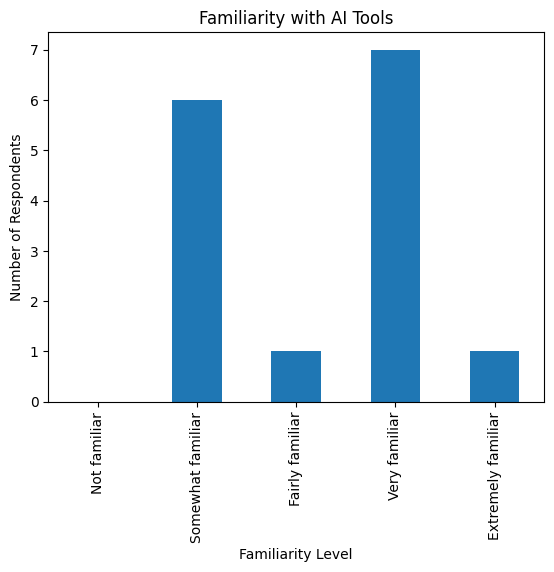

In [20]:
import matplotlib.pyplot as plt

ordinal_order = ['Not familiar', 'Somewhat familiar', 'Fairly familiar', 'Very familiar', 'Extremely familiar']
df['How familiar are you Artificial Intelligence tools?'].value_counts().reindex(ordinal_order).plot(kind='bar')
plt.title('Familiarity with AI Tools')
plt.xlabel('Familiarity Level')
plt.ylabel('Number of Respondents')
plt.show()

There are clear, substantial issues with how the dataset's information is handled given the lack of responses generated in the visualizations above. Below will be an extensive section that covers cleaning methods for each column so that it can be accurately represented in the analysis.

# Data Cleaning for All Columns

**CLEAN GRADE COLUMNS**

In [21]:
# unique values of grade
df['What is your grade level?'].unique()

array(['Senior', 'Junior', "Master's", 'transfer, effective Junior',
       'Sophomore', 'Freshman', 'Summer Prerequisites ', 'Third Year',
       'Graduate School', 'Graduate student',
       'hold a BSME, part-time accounting major ',
       '2025 college graduate ', 'Grad', 'Graduate Student, DPT',
       'Grad program', 'Graduate Student', 'Senior- Just graduated',
       'G1st year grad student', 'Graduate', 'Masters '], dtype=object)

In [22]:
# normalize values
df['grade_clean'] = df['What is your grade level?'].astype(str).str.lower().str.strip()

In [23]:
# function: classifies grades based on keywords
def classify_grade(text):
    if pd.isnull(text):
        return None
    text = text.strip().lower()
    if 'freshman' in text or 'summer prerequisites' in text:
        return 'freshman'
    if 'sophomore' in text:
        return 'sophomore'
    if 'junior' in text or 'third year' in text or 'transfer' in text:
        return 'junior'
    if 'senior' in text or 'just graduated' in text or '4th year' in text:
        return 'senior'
    if any(word in text for word in ['grad', 'master', 'phd', 'dpt', 'bsme']):
        return 'graduate'
    return None

In [24]:
# apply function to dataframe
df['grade_category'] = df['What is your grade level?'].astype(str).apply(classify_grade)

In [25]:
# numeric encoding
grade_encoding = {
    'freshman': 1,
    'sophomore': 2,
    'junior': 3,
    'senior': 4,
    'graduate': 5,
}

df['grade_encoded'] = df['grade_category'].map(grade_encoding)

In [26]:
print(df[['What is your grade level?', 'grade_category', 'grade_encoded']])

    What is your grade level? grade_category  grade_encoded
0                      Senior         senior              4
1                      Senior         senior              4
2                      Senior         senior              4
3                      Junior         junior              3
4                      Junior         junior              3
..                        ...            ...            ...
109                    Senior         senior              4
110                    Junior         junior              3
111                    Junior         junior              3
112                    Senior         senior              4
113                    Senior         senior              4

[114 rows x 3 columns]


In [27]:
# unique values of grade
df['grade_category'].unique()

array(['senior', 'junior', 'graduate', 'sophomore', 'freshman'],
      dtype=object)

In [28]:
# how many nan values
df['What is your grade level?'].isnull().sum()

np.int64(0)

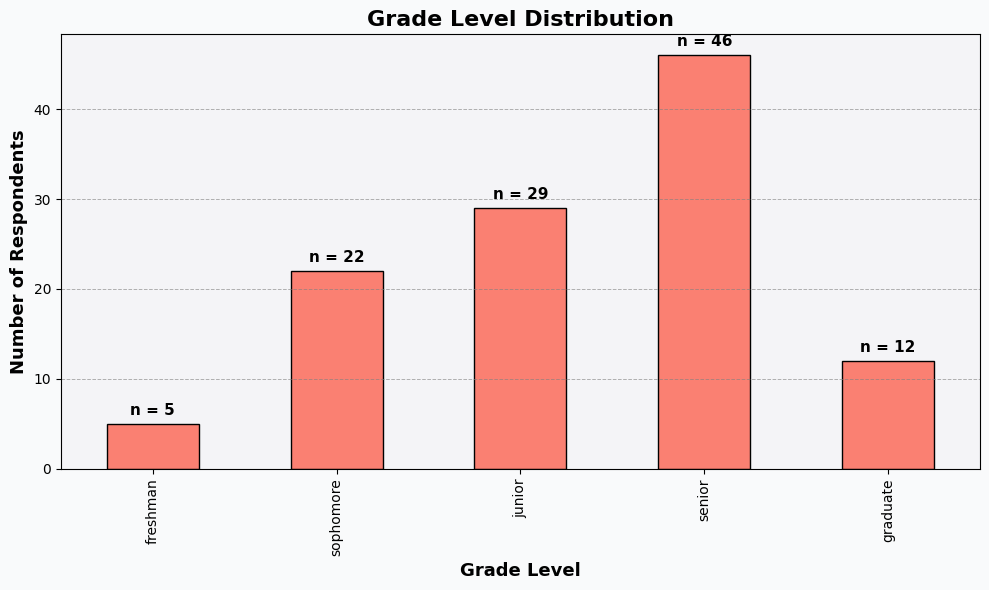

In [29]:
# ordinal grade distribution
class_order= [
    'freshman', 'sophomore', 'junior', 'senior', 'graduate'
]
# reindex to desired order
class_vis = df['grade_category'].value_counts()
class_vis = class_vis.reindex(class_order)

# bar plot of grade levels
plt.figure(figsize=(10, 6))
ax = class_vis.plot(kind='bar', color='salmon', edgecolor='black')
# total respondents equation
plt.title(f'Grade Level Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Grade Level', fontsize=13, fontweight='bold')
plt.ylabel('Number of Respondents', fontsize=13, fontweight='bold')
# change background to improve aesthetics
ax.set_facecolor('#f4f4f7')  # light gray for plot area
plt.gcf().set_facecolor('#f9fafb')  # very light gray for overall figure
# add dashed grid
ax.grid(axis='y', linestyle='--', color='gray', linewidth=0.7, alpha=0.6)
# add n-count on top of bars
for i, v in enumerate(class_vis):
    if pd.notna(v):
        ax.text(i, v + 0.7, f'n = {int(v)}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

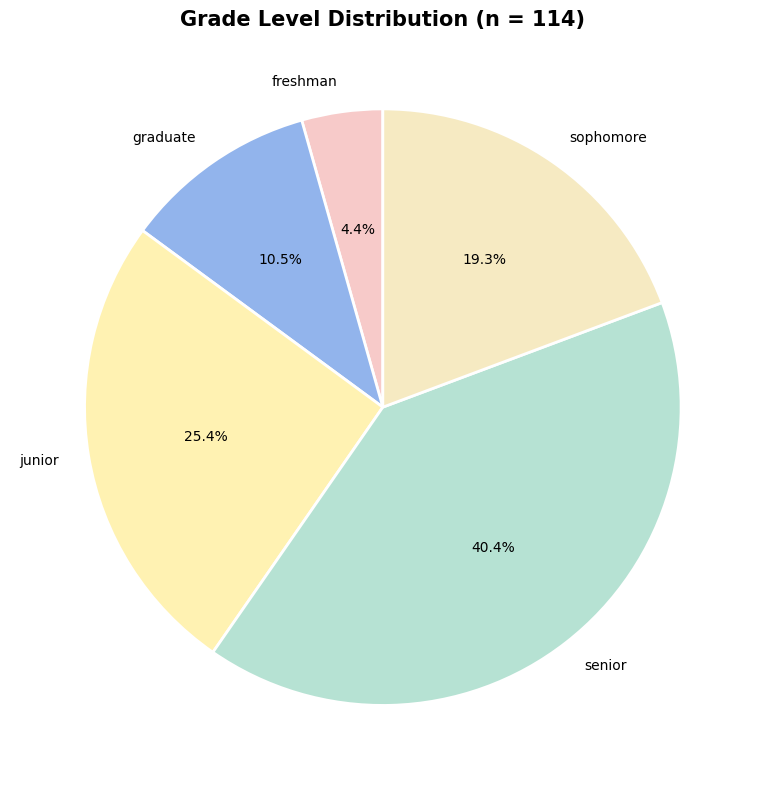

In [30]:
# soft pastel
colors = ['#f7cac9', '#92b4ec', '#fff2b2', '#b6e2d3', '#f6eac2']

# personal modifications
grade_counts = df['grade_category'].value_counts().sort_index()
labels = grade_counts.index
sizes = grade_counts.values

# pie chart of grade distribution
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
plt.title(f'Grade Level Distribution (n = {sum(sizes)})', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

**ENCODING GENDER**

In [31]:
gender_encoding = {
    'Male': 1,
    'Female': 2,
    'Non-Binary': 3
}

In [32]:
# apply mapping to create encoded column
df['gender_encoded'] = df['What gender do you identify as?'].map(gender_encoding)

In [33]:
# print result
print(df[['What gender do you identify as?', 'gender_encoded']])

    What gender do you identify as?  gender_encoded
0                              Male               1
1                              Male               1
2                              Male               1
3                              Male               1
4                              Male               1
..                              ...             ...
109                          Female               2
110                            Male               1
111                          Female               2
112                          Female               2
113                          Female               2

[114 rows x 2 columns]


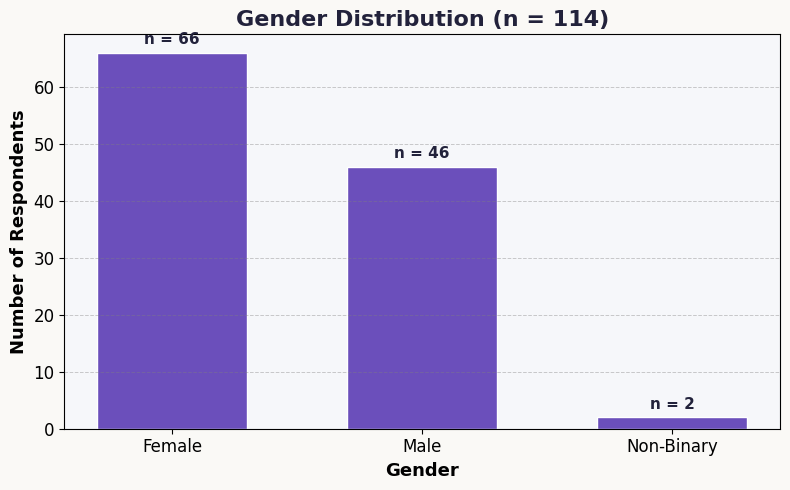

In [34]:
# count values and sort alphabetically
gender_counts = df['What gender do you identify as?'].value_counts().sort_index()
labels = gender_counts.index
values = gender_counts.values

# bar plot for gender distrubution
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color='#6b4fbb', edgecolor='white', width=0.6)
# add value labels above bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 1, f'n = {value}',
             ha='center', va='bottom', fontsize=11, fontweight='bold', color='#22223b')
# subtle grey effect
plt.gca().set_facecolor('#f6f7fa')
plt.gcf().set_facecolor('#faf9f6')
plt.grid(axis='y', linestyle='--', color='gray', linewidth=0.7, alpha=0.4)
# titling
total_n = int(values.sum())
plt.title(f'Gender Distribution (n = {total_n})', fontsize=16, fontweight='bold', color='#22223b')
plt.xlabel('Gender', fontsize=13, fontweight='bold')
plt.ylabel('Number of Respondents', fontsize=13, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

**MAPPING AND ENCODING MAJOR**

In [35]:
# unique values of major
df['What is your major?'].unique()

array(['Computer Science', 'Computer science', 'Math', 'Data Science',
       'CS', 'Political Science', 'History/Secondary Education', 'MECHE',
       'Psychology and Neuropharmacology', 'Computer science ',
       'Computer Science BS', 'Political Science and History ',
       'Civil Engineering', 'Electrical Engineering', 'Computer Science ',
       'computer science', 'Computer Science and Data Science',
       'Computer engineering',
       'Data Science & Sports Media Communications ',
       'Psychology & Communications (double major)', 'Film',
       'Landscape architecture ', 'Chemistry ', 'Biological Sciences',
       'neuroscience', 'N/a', 'Biology', 'Animal Science', 'Engineering',
       'Neuroscience Double; Directing', 'Literature', 'Psychology',
       'Education', 'Kinesiology', 'Accounting', 'Finance',
       'Communications', 'Double Major: Plant Science, Fine Arts',
       'Data Science ', 'english lit/film media', 'Business/Marketing',
       'Biotechnology', 'Text

In [36]:
category_keywords = {
    'it': [
        'computer science', 'cs', 'data science', 'applied math', 'computer engineering', 'informatics', 'cybersecurity'
    ],
    'engineering': [
        'engineering', 'meche', 'mechanical engineering', 'civil engineering', 'chemical engineering',
        'electrical engineering', 'biomedical engineering'
    ],
    'natural_sci': [
        'biology', 'biological science', 'neuroscience', 'chemistry', 'biotech', 'medical lab science',
        'animal science', 'plant science', 'marine biology', 'geological oceanography', 'wildlife', 'conservation',
        'environmental', 'kinese', 'kinesiology'
    ],
    'social_sci': [
        'political science', 'psychology', 'sociology', 'anthropology', 'public relations', 'ccj', 'soc', 'hdf'
    ],
    'business': [
        'accounting', 'finance', 'business', 'marketing', 'economics'
    ],
    'arts': [
        'film', 'media', 'literature', 'english', 'art', 'fine arts', 'music', 'theatre', 'directing'
    ],
    'education': [
        'education', 'elementary', 'secondary', 'teaching', 'doctor of physical therapy', 'physical therapy'
    ],
    'other': [
        'landscape architecture', 'marine affairs', 'textile merchandising', 'tmd', 'chinese', 'undecided'
    ]
}

In [37]:
# robust category function
def categorize_major(response, keyword_map=category_keywords):
    if not isinstance(response, str):
        return 'other'
    text = response.lower().strip()
    for category, keywords in keyword_map.items():
        for keyword in keywords:
            if keyword in text:
                return category
    return 'other'

In [38]:
# apply mapping
df['major_category'] = df['What is your major?'].apply(categorize_major)

In [39]:
# numeric encoding
category_codes = {cat: i for i, cat in enumerate(category_keywords.keys())}
df['major_encoded'] = df['major_category'].map(category_codes)

In [40]:
# print result
print(df[['What is your major?', 'major_category','major_encoded']])

                              What is your major? major_category  \
0                                Computer Science             it   
1                                Computer science             it   
2                                Computer Science             it   
3                                Computer Science             it   
4                                            Math          other   
..                                            ...            ...   
109  environmental and natural resource economics             it   
110                       Mechanical Engineering     engineering   
111               Public Relations, Communication     social_sci   
112                         Computer Engineering              it   
113                                 Biotechnology    natural_sci   

     major_encoded  
0                0  
1                0  
2                0  
3                0  
4                7  
..             ...  
109              0  
110            

In [41]:
# count category responses
category_counts = df['major_category'].value_counts()
print(category_counts)

major_category
it             35
natural_sci    27
social_sci     15
engineering    12
education       8
other           8
arts            5
business        4
Name: count, dtype: int64


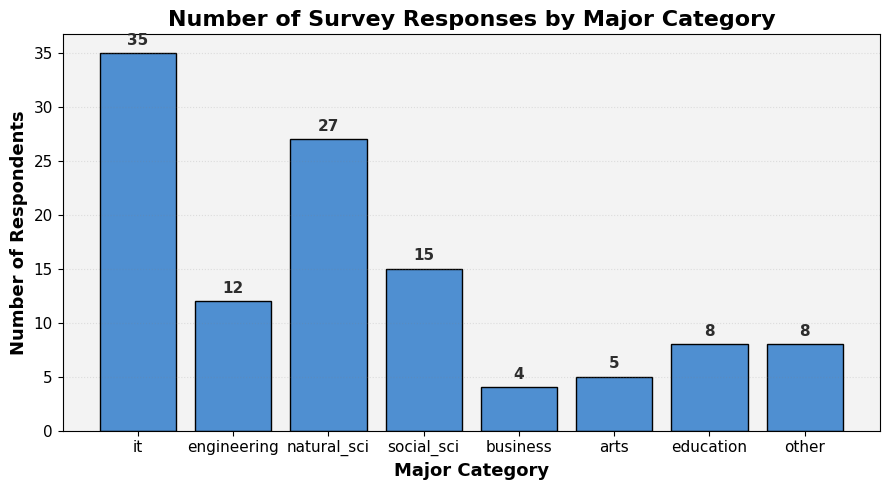

In [42]:
categories = ['it', 'engineering', 'natural_sci', 'social_sci', 'business', 'arts', 'education', 'other']
counts = df['major_category'].value_counts().reindex(categories, fill_value=0)
plt.figure(figsize=(9, 5))
bars = plt.bar(categories, counts, color='#4f8fd1', edgecolor='black')

# include number labels above bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f"{int(bar.get_height())}", ha='center', va='bottom', fontsize=11, fontweight='bold', color='#2d2d2d')

# plot style
plt.gca().set_facecolor('#f3f3f3')
plt.grid(axis='y', linestyle=':', color='gray', alpha=0.2)

# title and axis labels
plt.title('Number of Survey Responses by Major Category', fontsize=16, fontweight='bold')
plt.xlabel('Major Category', fontsize=13, fontweight='bold')
plt.ylabel('Number of Respondents', fontsize=13, fontweight='bold')

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

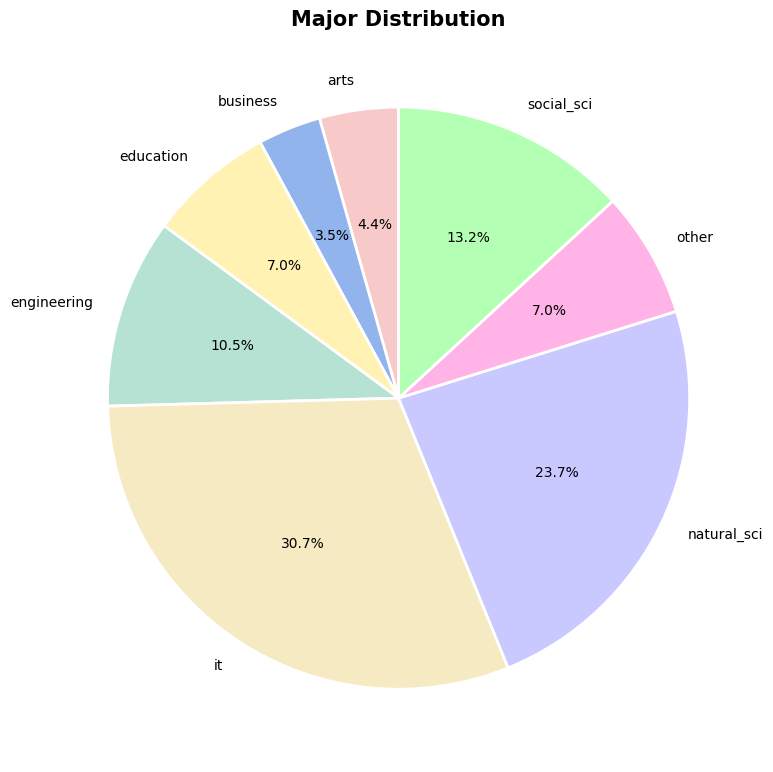

In [43]:
# soft pastel
colors = ['#f7cac9', '#92b4ec', '#fff2b2', '#b6e2d3', '#f6eac2', '#c9c9ff', '#ffb3e6', '#b3ffb3'] # Added colors for all major categories

# personal modifications
grade_counts_major = df['major_category'].value_counts().sort_index()
labels_major = grade_counts_major.index
sizes_major = grade_counts_major.values

# pie chart of major distribution
plt.figure(figsize=(8, 8))
plt.pie(
    sizes_major,
    labels=labels_major,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
plt.title(f'Major Distribution', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

**MAPPING AND ENCODING ETHNICITY**

In [44]:
# unique values of major
df['What is your race / ethnic background?'].unique()

array(['Asian', 'White / Caucasian', 'Hispanic / Latino',
       'Black / African American', 'Prefer not to say',
       'Black, Native American', 'african american and native american',
       'Mixed'], dtype=object)

In [45]:
# category keywords
ethnicity_keywords = {
    'asian': ['asian'],
    'white': ['white', 'caucasian'],
    'latino': ['latino', 'hispanic'],
    'black': ['black', 'african american'],
    'native_american': ['native american'],
    'multiracial': ['mixed', 'multiracial', 'african american and native american'],
    'notsay': ['prefer not to say'],
}

In [46]:
# categorization function
import re

def categorize_ethnicity(response, keyword_map=ethnicity_keywords):
    if not isinstance(response, str):
        return 'other'
    text = response.lower().strip()
    for category, keywords in keyword_map.items():
        for keyword in keywords:
            # use regex for whole word (avoid 'asian' in 'caucasian')
            if re.search(r'\b' + re.escape(keyword) + r'\b', text):
                return category
    return 'other'

In [47]:
# apply to dataframe
df['ethnicity_category'] = df['What is your race / ethnic background?'].apply(categorize_ethnicity)

In [48]:
# encode categories
ethnicity_codes = {cat: i for i, cat in enumerate(ethnicity_keywords.keys())}
df['ethnicity_encoded'] = df['ethnicity_category'].map(ethnicity_codes)

In [49]:
# any missing values?
df['What is your race / ethnic background?'].isnull().sum()

np.int64(0)

In [50]:
# print result
print(df[['What is your race / ethnic background?', 'ethnicity_category', 'ethnicity_encoded']])

    What is your race / ethnic background? ethnicity_category  \
0                                    Asian              asian   
1                                    Asian              asian   
2                        White / Caucasian              white   
3                        Hispanic / Latino             latino   
4                        White / Caucasian              white   
..                                     ...                ...   
109                      White / Caucasian              white   
110                      White / Caucasian              white   
111                      White / Caucasian              white   
112                      White / Caucasian              white   
113                      White / Caucasian              white   

     ethnicity_encoded  
0                    0  
1                    0  
2                    1  
3                    2  
4                    1  
..                 ...  
109                  1  
110                

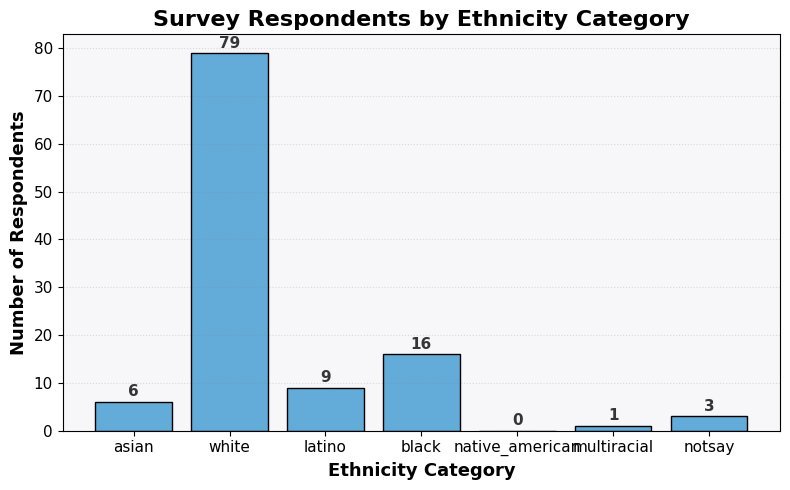

In [51]:
# count occurrences and ensure all categories are present
categories = list(ethnicity_keywords.keys())
counts = df['ethnicity_category'].value_counts().reindex(categories, fill_value=0)

# bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(categories, counts, color='#63abd9', edgecolor='black')

# value labels on bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f"{int(bar.get_height())}", ha='center', va='bottom',
             fontsize=11, fontweight='bold', color='#353535')

plt.gca().set_facecolor('#f7f7fa')
plt.grid(axis='y', linestyle=':', color='gray', alpha=0.25)
plt.title('Survey Respondents by Ethnicity Category', fontsize=16, fontweight='bold')
plt.xlabel('Ethnicity Category', fontsize=13, fontweight='bold')
plt.ylabel('Number of Respondents', fontsize=13, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

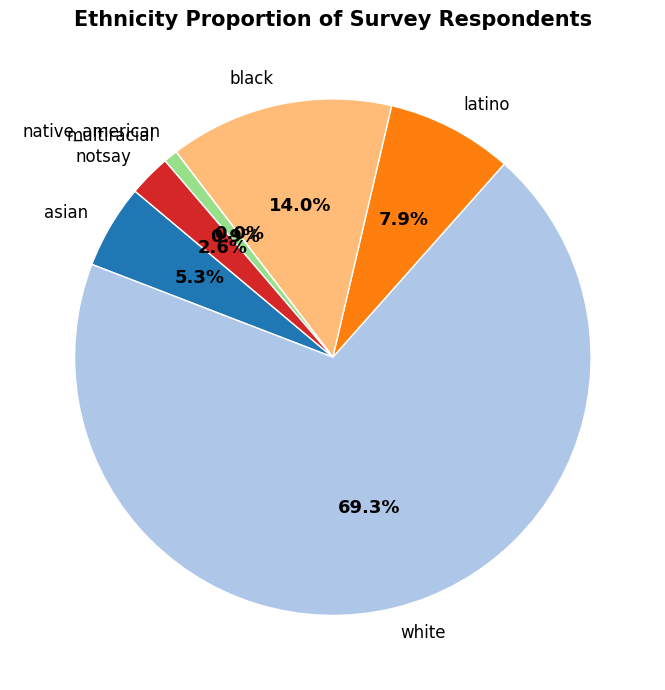

In [52]:
plt.figure(figsize=(7,7))
colors = plt.get_cmap('tab20').colors
patches, texts, autotexts = plt.pie(
    counts, labels=categories, autopct='%1.1f%%', colors=colors[:len(categories)],
    startangle=140, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'white'}
)
plt.setp(autotexts, size=13, weight='bold')
plt.title('Ethnicity Proportion of Survey Respondents', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

**MAPPING AND ENCODING AI TOOL FAMILIARITY**

In [53]:
# unique values for ai tool familiarity
df['How familiar are you Artificial Intelligence tools?'].unique()

array(['Fairly', 'medium level', 'Very familiar', 'Reasonably familiar',
       'I am somewhat familiar, but still relatively new to using them.',
       'somewhat ', 'Somewhat familiar', 'Moderately',
       'I know a little bit about it but I just use it for proofreading ',
       'Fairly ', 'Pretty familiar', 'Pretty familiar ',
       "Familiar. There are several varieties, including analytical (research assistance, automatic features in cars, algorithms that control social media, etc) and generative (hallucinates output from a wide input dataset). I don't know which type you mean for the next question, but I'm going with generative.",
       'Very ', 'Familiar', 'Proficient',
       'I am fairly familiar, comfortable using ChatGPT, im aware of tools like Cursor, Claude, CoPilot, etc. ',
       'alright', 'Very', 'Semi familiar ', 'Not very ',
       'Kinda familiar ', 'Moderately experienced', 'pretty familiar',
       'Semi-familiar',
       "I think I'm pretty familiar with them

In [54]:
familiarity_keywords = {
    'Very Familiar': [
        'very familiar', 'extremely familiar', 'absolutely', 'use it daily',
        'conducted my own research', 'work on a grant', 'expert', 'avid',
        'completely'
    ],
    'Quite Familiar': [
        'fairly familiar', 'pretty familiar', 'moderately familiar',
        'reasonably familiar', 'proficient', 'intermediate', 'regular use',
        'comfortable'
    ],
    'Somewhat Familiar': [
        'somewhat familiar', 'semi-familiar', 'semi familiar', 'alright',
        'average', 'relatively familiar', 'kinda familiar', 'sort of',
        'decent', 'have used',
        'familiar with its use, not with its development',
        'don’t use extensively', 'not as much as other students'
    ],
    'Slightly Familiar': [
        'not very familiar', 'just a little', 'a little', 'basic', 'vague',
        'only use chatgpt', 'aware', 'not really', 'only used a little',
        'not much', 'not as much', 'slightly'
    ]
}

In [55]:
# categorization function
def categorize_familiarity(response):
    if not isinstance(response, str):
        return 'Slightly Familiar'
    text = response.lower().strip()
    # Priority: High Familiarity → Negative Familiarity → Neutral
    for keyword in familiarity_keywords['Very Familiar']:
        if keyword in text:
            return 'Very Familiar'
    for keyword in familiarity_keywords['Quite Familiar']:
        if keyword in text:
            return 'Quite Familiar'
    for keyword in familiarity_keywords['Somewhat Familiar']:
        if keyword in text:
            return 'Somewhat Familiar'
    for keyword in familiarity_keywords['Slightly Familiar']:
        if keyword in text:
            return 'Slightly Familiar'
    # Fallbacks based on presence of "familiar"
    if 'familiar' in text:
        return 'Somewhat Familiar'
    return 'Slightly Familiar'

In [56]:
# category assignment
df['familiarity_category'] = df['How familiar are you Artificial Intelligence tools?'].apply(categorize_familiarity)

In [57]:
# map ordinal categories
category_order = ['Slightly Familiar', 'Somewhat Familiar', 'Quite Familiar', 'Very Familiar']
category_codes = {cat: i for i, cat in enumerate(category_order)}
df['familiarity_encoded'] = df['familiarity_category'].map(category_codes)

In [58]:
# any missing values
df['How familiar are you Artificial Intelligence tools?'].isnull().sum()

np.int64(0)

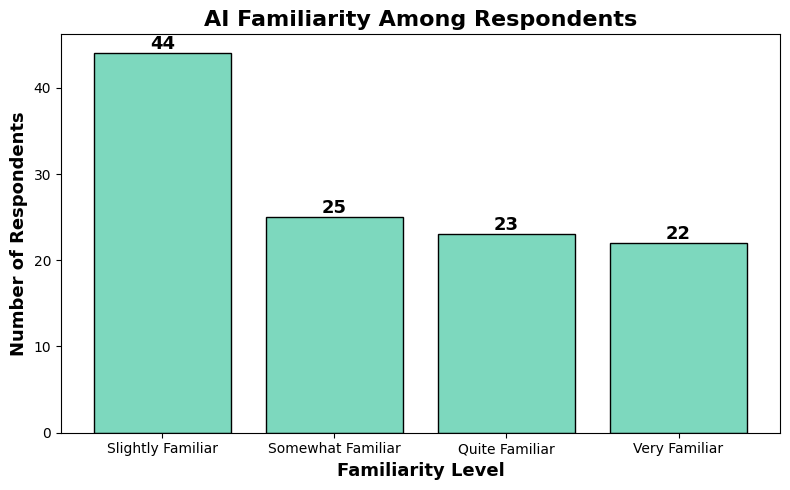

In [59]:
# bar chart
import matplotlib.pyplot as plt

counts = df['familiarity_category'].value_counts().reindex(category_order, fill_value=0)
plt.figure(figsize=(8,5))
bars = plt.bar(category_order, counts, color='#7dd8be', edgecolor='black')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.5, int(bar.get_height()),
             ha='center', fontweight='bold', fontsize=13)
plt.title("AI Familiarity Among Respondents", fontweight='bold', fontsize=16)
plt.xlabel("Familiarity Level", fontweight='bold', fontsize=13)
plt.ylabel("Number of Respondents", fontweight='bold', fontsize=13)
plt.tight_layout()
plt.show()

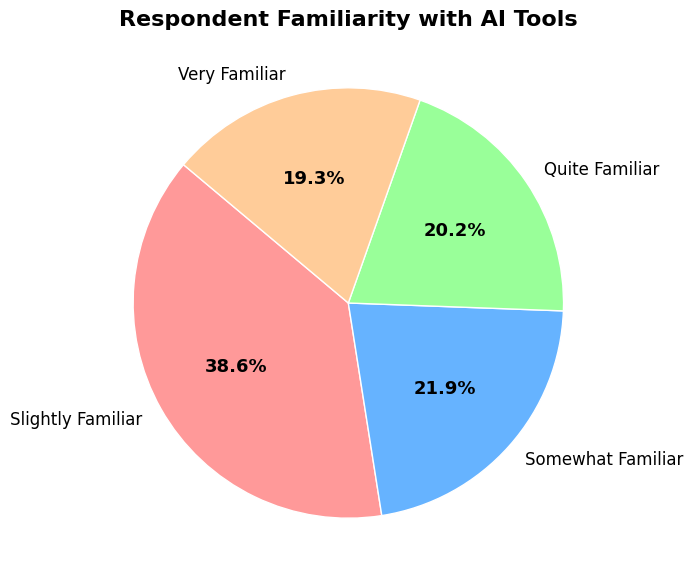

In [60]:
# pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(7,7))
patches, texts, autotexts = plt.pie(
    counts,
    labels=category_order,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'white'}
)

plt.setp(autotexts, size=13, weight='bold')
plt.title('Respondent Familiarity with AI Tools', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**DURATION OF AI TOOL USE MAPPING AND ENCODING**

In [61]:
encoding_map = {
    'Within the last year': 1,
    '1-2 years': 2,
    '2-3 years': 3,
    '3-4 years': 4,
    '4+ years': 5
}

df['duration_encoded'] = df['How long have you been using AI tools for?'].map(encoding_map)

In [62]:
# define categories
categories = [
    'Within the last year',
    '1-2 years',
    '2-3 years',
    '3-4 years',
    '4+ years'
]
counts = df['How long have you been using AI tools for?'].value_counts().reindex(categories, fill_value=0)

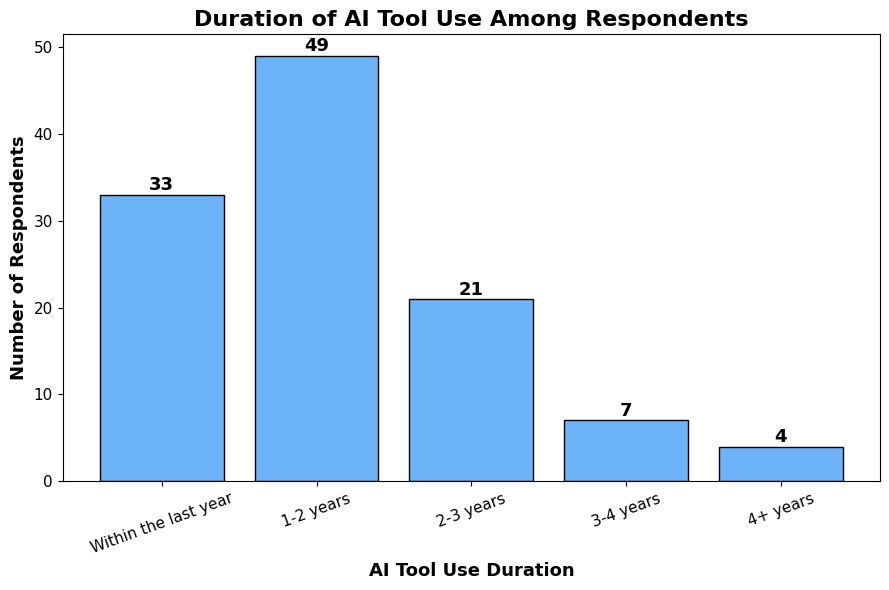

In [63]:
# bar plot
plt.figure(figsize=(9, 6))
bars = plt.bar(categories, counts, color='#6db3f7', edgecolor='black')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.5,
             int(bar.get_height()), ha='center', fontweight='bold', fontsize=13)

plt.title('Duration of AI Tool Use Among Respondents', fontsize=16, fontweight='bold')
plt.xlabel('AI Tool Use Duration', fontsize=13, fontweight='bold')
plt.ylabel('Number of Respondents', fontsize=13, fontweight='bold')
plt.xticks(rotation=20, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

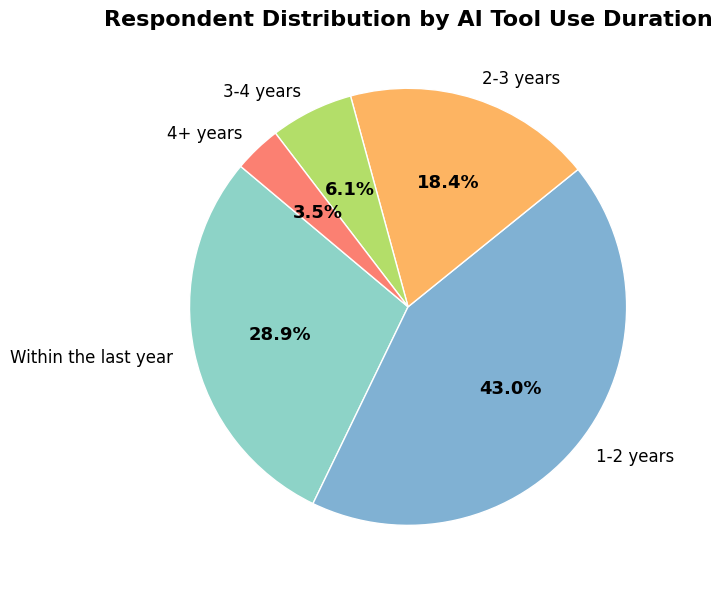

In [64]:
# pie chart
colors = ['#8dd3c7', '#80b1d3', '#fdb462', '#b3de69', '#fb8072']

plt.figure(figsize=(7,7))
patches, texts, autotexts = plt.pie(
    counts,
    labels=categories,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'white'}
)
plt.setp(autotexts, size=13, weight='bold')
plt.title('Respondent Distribution by AI Tool Use Duration', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [65]:
# how many missing values
df['How long have you been using AI tools for?'].isnull().sum()

np.int64(0)

In [66]:
# print result
print(df[['How long have you been using AI tools for?', 'duration_encoded']])

    How long have you been using AI tools for?  duration_encoded
0                                    1-2 years                 2
1                                    1-2 years                 2
2                                    2-3 years                 3
3                                    2-3 years                 3
4                         Within the last year                 1
..                                         ...               ...
109                       Within the last year                 1
110                                  3-4 years                 4
111                                  2-3 years                 3
112                       Within the last year                 1
113                                  3-4 years                 4

[114 rows x 2 columns]


**LIST TO AI TOOLS BEING USED**

In [67]:
# unique values of ai tools being used
df['What Artificial Intelligence tools do you frequently use? (If you use any tools in mind that are not in the checklist, please include in the "Other..." section)'].unique()

array(['', 'ChatGPT, Google Gemini, Canva, Microsoft Copilot',
       'ChatGPT, Google Gemini, Grammarly, Microsoft Copilot',
       'ChatGPT, Google Gemini', 'ChatGPT, Grammarly, Notion', 'ChatGPT',
       'ChatGPT, Grammarly, Microsoft Copilot', 'ChatGPT, Grammarly',
       'ChatGPT, Google Gemini, Grammarly, Canva, Quizlet',
       'ChatGPT, Microsoft Copilot, Claude',
       'Zero. None of these. "AI" is not descriptive enough. I use other forms of AI, not generative.',
       'ChatGPT, Grammarly, Canva, Notion, Quizlet',
       'ChatGPT, Google Gemini, Quizlet, Microsoft Copilot',
       'ChatGPT, Grammarly, Quizlet', 'ChatGPT, Microsoft Copilot',
       'ChatGPT, Claude',
       'ChatGPT, Google Gemini, Grammarly, Canva, Quizlet, Microsoft Copilot',
       'ChatGPT, Grammarly, Canva, Quizlet, Microsoft Copilot',
       'Quizlet, Math way ', 'ChatGPT, Grammarly, Perplexity',
       'ChatGPT, Canva, Quizlet', 'ChatGPT, Grammarly, Canva',
       'ChatGPT, Grammarly, Canva, Notion, Q

In [68]:
# split and clean student response
def split_tools(response):
    if not isinstance(response, str) or response.strip() == '':
        return []
    return [tool.strip().lower() for tool in response.split(',')]

df['ai_tools_list'] = df['What Artificial Intelligence tools do you frequently use? (If you use any tools in mind that are not in the checklist, please include in the "Other..." section)'].apply(split_tools)

In [69]:
# explode list for frequency analysis
df_exploded = df.explode('ai_tools_list')
df_exploded = df_exploded[df_exploded['ai_tools_list'].notna() & (df_exploded['ai_tools_list'] != '')]

In [70]:
# calculate frequency
tool_counts = df_exploded['ai_tools_list'].value_counts().sort_values(ascending=False)

In [71]:
# filter for clarity
tool_counts_filtered = tool_counts[tool_counts >= 5]

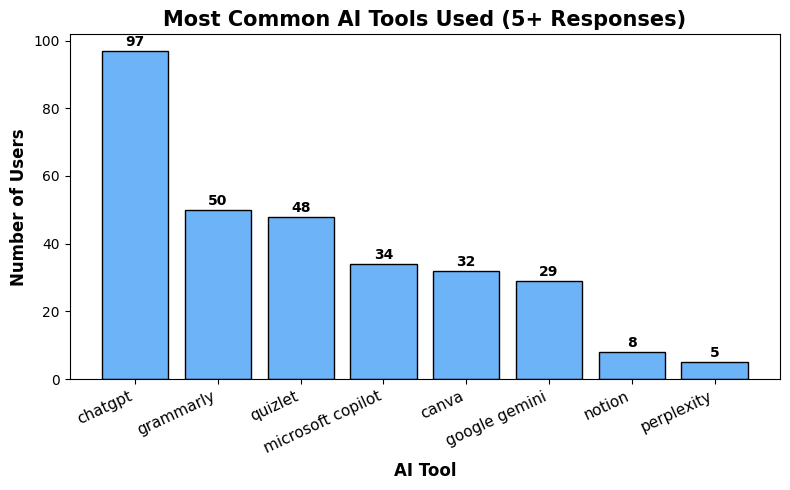

In [72]:
# bar chart visualization
plt.figure(figsize=(8, 5))
bars = plt.bar(tool_counts_filtered.index, tool_counts_filtered.values, color='#6db3f7', edgecolor='black')
plt.title('Most Common AI Tools Used (5+ Responses)', fontsize=15, fontweight='bold')
plt.xlabel('AI Tool', fontsize=12, fontweight='bold')
plt.ylabel('Number of Users', fontsize=12, fontweight='bold')
plt.xticks(rotation=25, ha='right', fontsize=11)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, int(bar.get_height()), ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

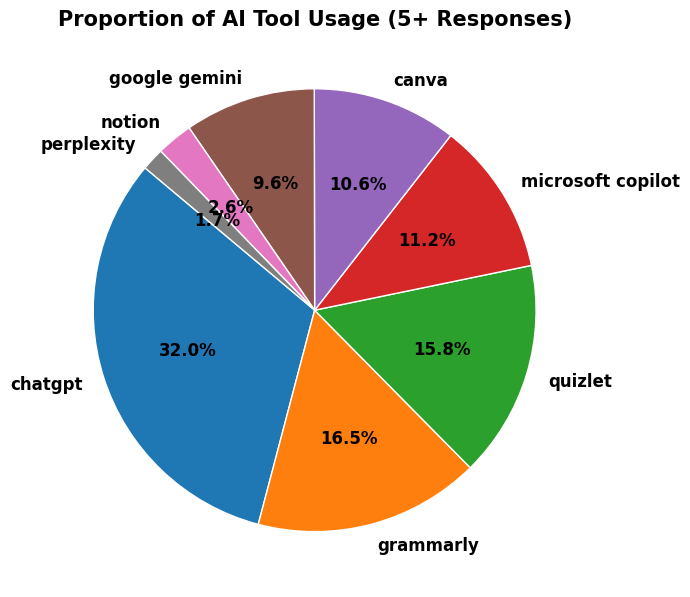

In [73]:
# pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    tool_counts_filtered.values,
    labels=tool_counts_filtered.index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12, 'weight': 'bold'},
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Proportion of AI Tool Usage (5+ Responses)', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

In [74]:
# demonstrating encoding
print(df[['What Artificial Intelligence tools do you frequently use? (If you use any tools in mind that are not in the checklist, please include in the "Other..." section)', 'ai_tools_list']])

    What Artificial Intelligence tools do you frequently use? (If you use any tools in mind that are not in the checklist, please include in the "Other..." section)  \
0                                                                                                                                                                      
1     ChatGPT, Google Gemini, Canva, Microsoft Copilot                                                                                                                 
2    ChatGPT, Google Gemini, Grammarly, Microsoft C...                                                                                                                 
3                               ChatGPT, Google Gemini                                                                                                                 
4                               ChatGPT, Google Gemini                                                                                                          

In [75]:
# any missing values?
df['What Artificial Intelligence tools do you frequently use? (If you use any tools in mind that are not in the checklist, please include in the "Other..." section)'].isnull().sum()

np.int64(0)

**ENCODING AND CLEANING EXPLANATION OF FINITE AMOUNT OF AI USE**

In [76]:
# unique values of finite ai use
df['How often do you use these AI tools? Please estimate how many times per week or month you use these tools.'].unique()

array(['Rarely ever', '2-5 times per week', '1 - 2 times per week',
       'Strictly only for education, when I am not in school I never touch AI. but while in school id say everyday of the week.',
       'Anywhere from twice a month to twice a day.',
       'I use ChatGPT several times a week, but not enough that I have felt the need to buy a subscription to the service; all this information is mostly already on Google, and Gemini is now able to point me to what I am looking for most of the time. Accordingly, I use Gemini all the time. I use Grammarly about twice a month whenever I need to proofread something important. I use Notion all the time, but I pretty much never use the AI features.',
       '25/8', 'Once per week', '3 times per week',
       '3-4 times per month during the school year ',
       'Maybe four times a week',
       '1-2 times per week depending on my desperation level. If I am using chatgpt without it being assigned, it is usually to shorten papers to the word li

In [77]:
# keywords
frequency_keywords = {
    'Never or Rarely': [
        'rarely', 'not really ever', 'never', 'i try not to', 'not often',
        'no generative', 'avoid', 'haven\'t had to use it', 'not often anymore'
    ],
    'Monthly or Less': [
        'once a month', 'once per month', 'twice a month', 'every month',
        'once maybe', 'once every month', 'every other month',
        'less than once a month', '1-2 times per month',
        'once or twice a month', 'maybe once a month',
        'about three times a month', 'maybe once every two weeks',
        'once every two weeks', 'twice a month', 'monthly'
    ],
    'Weekly': [
        'per week', 'weekly', 'a week', 'couple times a week', 'once a week',
        'twice a week', '2-3 times a week', '3-4 times a week',
        'few times a week', 'several times a week', 'maybe four times a week',
        '1-3 times a week', '2-5 times per week', '1-2 times per week',
        'maybe 3 times a week', 'at least once a week',
        'two to three times a week', 'four times a week', 'five times a week',
        'several times a week', 'every week', 'few times a week',
        'during school, at least once a week'
    ],
    'Daily or More': [
        'every day', 'everyday', 'daily', 'once per day', 'once a day',
        'multiple times per day', 'several times daily', 'all the time',
        'twice a day', 'five times a day', '25/8'
    ]
}

In [78]:
# create a strong frequency matcher
def extract_matches(text, keyword_map):
    matches = []
    # normalize text
    text = text.lower().strip()
    # check for matches
    for category, keywords in keyword_map.items():
        for keyword in keywords:
            if keyword in text:
                matches.append(category) # category counts once per match
    # rule based numeric regex matching
    if re.search(r'\b\d+\s*(x|times)?\s*(per\s*)?(week|wk|wks)\b', text):
        matches.append('Weekly')
    if re.search(r'\b\d+\s*(x|times)?\s*(per\s*)?(day|daily)\b', text):
        matches.append('Daily or More')
    if re.search(r'\b\d+\s*(x|times)?\s*(per\s*)?(month|mo)\b', text):
        matches.append('Monthly or Less')
    # remove duplicates
    return list(set(matches))

In [79]:
# categorization function
def categorize_frequency(response, keyword_map=frequency_keywords):
    if not isinstance(response, str) or response.strip() == "":
        return "Never or Rarely"

    # call match function
    matches = extract_matches(response, keyword_map)

    # priority assessment when count has multiple potential matches
    priority = ['Daily or More', 'Weekly', 'Monthly or Less', 'Never or Rarely']
    for category in priority:
        if category in matches:
            return category

    return "Never or Rarely"

In [80]:
# apply dataframe
df['frequency_category'] = df['How often do you use these AI tools? Please estimate how many times per week or month you use these tools.'].apply(categorize_frequency)

In [81]:
# numeric encoding
category_order = ['Never or Rarely', 'Monthly or Less', 'Weekly', 'Daily or More']
category_codes = {cat: i for i, cat in enumerate(category_order)}
df['frequency_encoded'] = df['frequency_category'].map(category_codes)

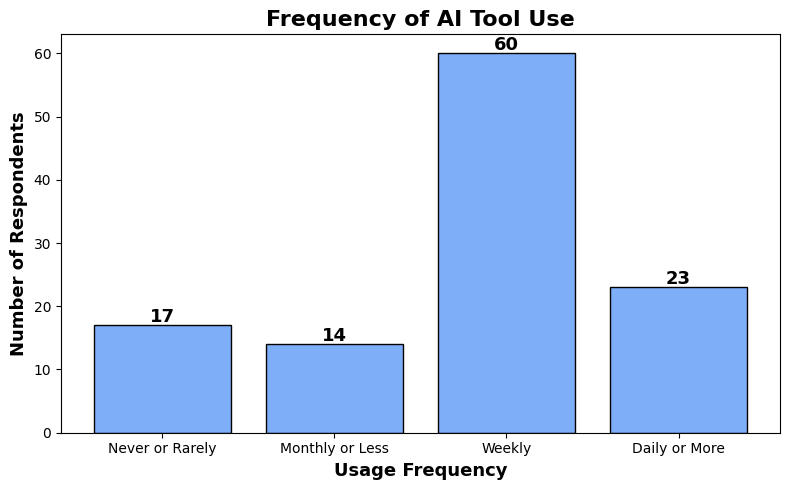

In [82]:
# bar chart
counts = df['frequency_category'].value_counts().reindex(category_order, fill_value=0)

plt.figure(figsize=(8,5))
bars = plt.bar(category_order, counts, color='#7daef7', edgecolor='black')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.5,
             int(bar.get_height()), ha='center', fontweight='bold', fontsize=13)
plt.title('Frequency of AI Tool Use', fontweight='bold', fontsize=16)
plt.xlabel('Usage Frequency', fontweight='bold', fontsize=13)
plt.ylabel('Number of Respondents', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.show()

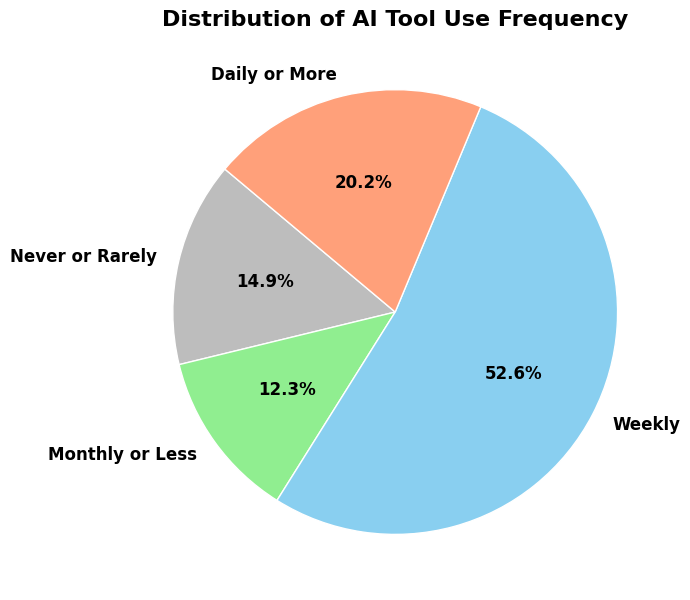

In [83]:
# pie chart
plt.figure(figsize=(7,7))
colors = ['#bdbdbd', '#90ee90', '#89cff0', '#ffa07a']
plt.pie(counts, labels=category_order, autopct='%1.1f%%', startangle=140,
        colors=colors, textprops={'fontsize':12, 'weight':'bold'},
        wedgeprops={'edgecolor':'white'})
plt.title('Distribution of AI Tool Use Frequency', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**NOTE**: I particularly focused on minimizing bias as much as I could for this section because of the natural skew in the data and regardless of manipulation tactics, over 1/2 of the respondents suggest they use AI Tools on a Weekly basis. The data is naturally skewed, but says a lot of about the current state of AI tools and students that took this survey.

In [84]:
# demonstrating encoding
print(df[['How often do you use these AI tools? Please estimate how many times per week or month you use these tools.', 'frequency_category', 'frequency_encoded']])

    How often do you use these AI tools? Please estimate how many times per week or month you use these tools.  \
0                                          Rarely ever                                                           
1                                   2-5 times per week                                                           
2                                 1 - 2 times per week                                                           
3    Strictly only for education, when I am not in ...                                                           
4          Anywhere from twice a month to twice a day.                                                           
..                                                 ...                                                           
109  during school, at least once a week. outside o...                                                           
110                                          Every Day                                  

**MAPPING AND ENCODING TYPES OF ACADEMIC TASKS**

In [85]:
df['What types of academic tasks do you use AI tools for?'].unique()

array(['Writing, Studying, Brainstorming', 'Brainstorming',
       'Writing, Research, Programming, Studying',
       'Programming, Studying', 'Programming',
       'Writing, Research, Programming, Studying, Brainstorming',
       'Writing, Programming, Brainstorming', 'Research, Brainstorming',
       'Research, Programming, Brainstorming', 'Writing', 'NOTHING ',
       'Research', 'Studying',
       'Writing, Programming, Studying, explaining topics more in depth',
       'Writing, Programming, Studying, Brainstorming',
       'Programming, Studying, Brainstorming', 'Studying, Brainstorming',
       'Programming, Brainstorming, Rewording ideas to better understand them',
       'Research, Studying, Brainstorming',
       'Writing, Research, Studying, Brainstorming',
       'Writing, Research, Brainstorming, weightlifting split and helping with my life plan ',
       'Writing, Research, Studying',
       'Writing, Research, Studying, Brainstorming, Help with mapping out steps for comp

In [86]:
# split and clean response
def split_tasks(response):
    if not isinstance(response, str) or response.strip() == '':
        return []
    # Lowercase for uniformity and strip whitespace
    return [task.strip().capitalize() for task in response.split(',') if task.strip()]

df['ai_tasks_list'] = df['What types of academic tasks do you use AI tools for?'].apply(split_tasks)

In [87]:
# explode list
df_exploded = df.explode('ai_tasks_list')
# count task use
df_exploded = df_exploded[df_exploded['ai_tasks_list'].notna() & (df_exploded['ai_tasks_list'] != '')]
task_counts = df_exploded['ai_tasks_list'].value_counts().sort_values(ascending=False)

In [88]:
# filter for clarity
filtered_task_counts = task_counts[task_counts >= 5]

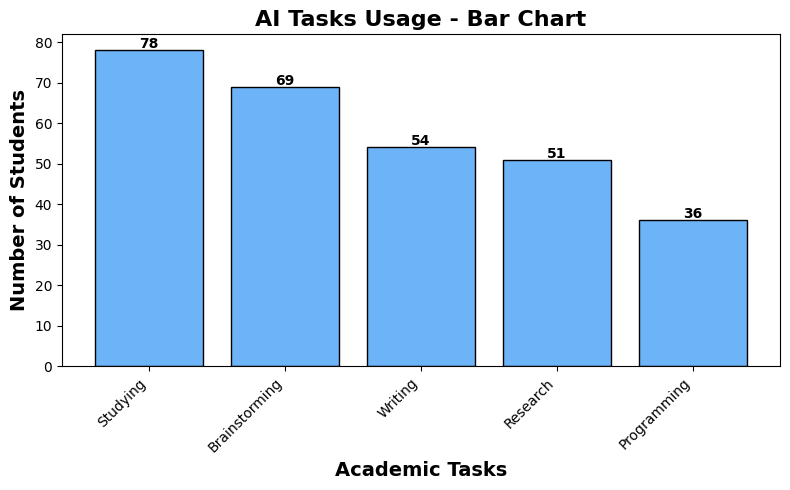

In [89]:
# bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(filtered_task_counts.index, filtered_task_counts.values, color='#6db3f7', edgecolor='black')
plt.title('AI Tasks Usage - Bar Chart', fontsize=16, fontweight='bold')
plt.xlabel('Academic Tasks', fontsize=14, fontweight='bold')
plt.ylabel('Number of Students', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, int(bar.get_height()), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

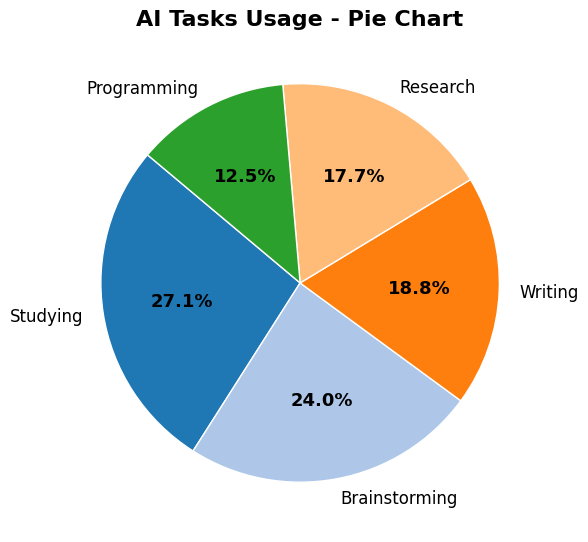

In [90]:
# pie chart
plt.figure(figsize=(6, 6))
colors = plt.get_cmap('tab20').colors[:len(filtered_task_counts)]
patches, texts, autotexts = plt.pie(
    filtered_task_counts.values,
    labels=filtered_task_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'white'}
)
plt.setp(autotexts, size=13, weight='bold')
plt.title('AI Tasks Usage - Pie Chart', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**MAPPING AND ENCODING COLLEGE SUBJECTS OF AI USE**

In [91]:
# unique values of college subjects
df['What college subjects do you often use AI tools for? Please list specific course names or subject areas.'].unique()

array(['', 'Computer Science',
       'Computer Science, Data Science, Health Sciences (Agriculture, Nutrition, etc.), Natural Sciences (Biology, Chemistry, etc.)',
       'Computer Science, Data Science, Mathematics (Calculus, Statistics, etc.)',
       'Data Science',
       'Computer Science, Mathematics (Calculus, Statistics, etc.)',
       'Social Sciences (Psychology, Political Science, etc.)',
       'Arts & Humanities, Education, Social Sciences (Psychology, Political Science, etc.)',
       'Writing',
       'Natural Sciences (Biology, Chemistry, etc.), Social Sciences (Psychology, Political Science, etc.)',
       'Business (Finance, Marketing, etc.), Engineering (Mechanical, Electrical, etc.)',
       'Computer Science, Engineering (Mechanical, Electrical, etc.)',
       'Computer Science, Natural Sciences (Biology, Chemistry, etc.)',
       'Computer Science, Data Science, Journalism / Communication / Media Studies, Mathematics (Calculus, Statistics, etc.)',
       'Health 

In [92]:
# split and clean data
def split_tasks(response):
    if not isinstance(response, str) or response.strip() == '':
        return []
    return [task.strip() for task in response.split(',') if task.strip()]

df['ai_subjects_list'] = df['What college subjects do you often use AI tools for? Please list specific course names or subject areas.'].apply(split_tasks)

In [93]:
# explode list for frequency analysis
df_exploded = df.explode('ai_subjects_list')
# column uniformity
df_exploded['ai_subjects_list'] = df_exploded['ai_subjects_list'].astype(str).str.strip().str.lower()
# remove  parentheses and content
def strip_parentheses(text):
    return re.sub(r'\s*\(.*?\)\s*', '', text).strip()

df_exploded['ai_subjects_list'] = df_exploded['ai_subjects_list'].apply(strip_parentheses)

# remove 'etc.' variants
df_exploded = df_exploded[~df_exploded['ai_subjects_list'].str.fullmatch(r'etc\.?', case=False, na=False)]

# remove any residual empty or blank categories
df_exploded = df_exploded[df_exploded['ai_subjects_list'].str.strip() != '']

In [94]:
# count task frequency
task_counts = df_exploded['ai_subjects_list'].value_counts()
task_counts_filtered = task_counts[task_counts >= 20]

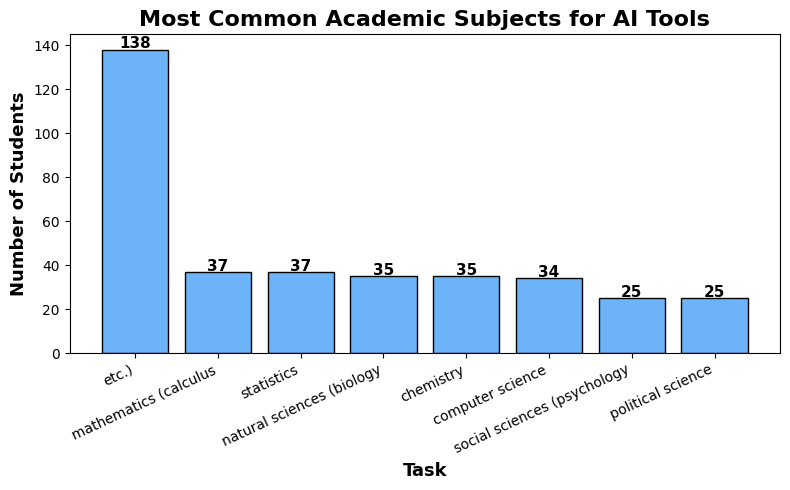

In [95]:
# bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(task_counts_filtered.index, task_counts_filtered.values,
               color='#6db3f7', edgecolor='black')
plt.title('Most Common Academic Subjects for AI Tools', fontsize=16, fontweight='bold')
plt.xlabel('Task', fontsize=13, fontweight='bold')
plt.ylabel('Number of Students', fontsize=13, fontweight='bold')
plt.xticks(rotation=25, ha='right')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             int(bar.get_height()), ha='center', fontweight='bold', fontsize=11)
plt.tight_layout()
plt.show()

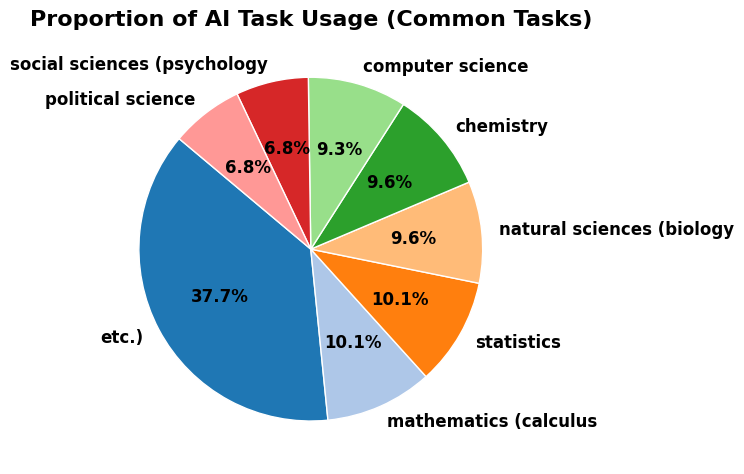

In [96]:
# pie chart
plt.figure(figsize=(7, 7))
colors = plt.get_cmap('tab20').colors[:len(task_counts_filtered)]
patches, texts, autotexts = plt.pie(
    task_counts_filtered.values,
    labels=task_counts_filtered.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12, 'weight': 'bold'},
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Proportion of AI Task Usage (Common Tasks)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**ENCODING BINARY BENEFITS AND CHALLENGES**

In [97]:
# unique values
df['Have you experienced any benefits or challenges when using AI tools for academic purposes?'].unique()

array(['Yes', 'No'], dtype=object)

In [98]:
# encoding decision
benchal_encoding = {
    'Yes': 1,
    'No': 2,
}

df['benchal_encoded'] = df['Have you experienced any benefits or challenges when using AI tools for academic purposes?'].map(benchal_encoding)

In [99]:
# any missing data
missing_count = df['benchal_encoded'].isnull().sum()
print(f"Missing or unmapped entries: {missing_count}")

Missing or unmapped entries: 0


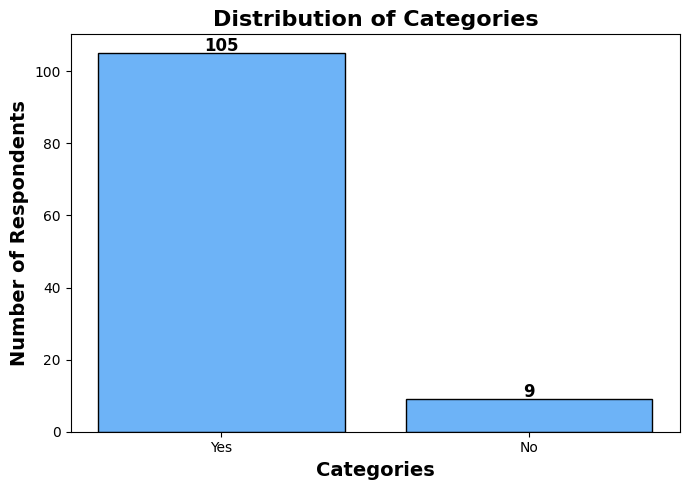

In [100]:
# bar chart
benchal_categories = [
    'Yes',
    'No'
]
counts = df['Have you experienced any benefits or challenges when using AI tools for academic purposes?'].value_counts().reindex(benchal_categories, fill_value=0)
plt.figure(figsize=(7, 5))
bars = plt.bar(benchal_categories, counts, color='#6db3f7', edgecolor='black')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, int(bar.get_height()),
             ha='center', fontweight='bold', fontsize=12)
plt.title('Distribution of Categories', fontsize=16, fontweight='bold')
plt.xlabel('Categories', fontsize=14, fontweight='bold')
plt.ylabel('Number of Respondents', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

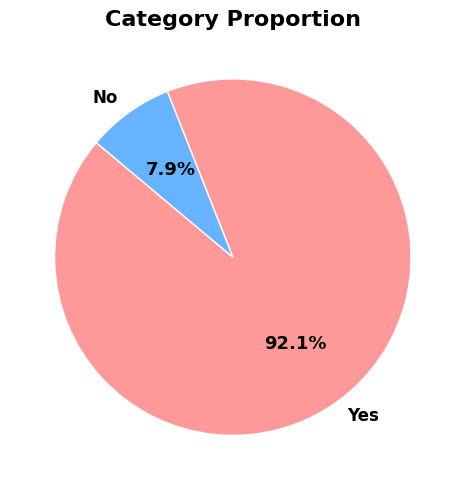

In [101]:
# pie chart
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(5, 5))
patches, texts, autotexts = plt.pie(
    counts,
    labels=counts.index,  # Use the index of the counts Series as labels
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    textprops={'fontsize': 12, 'weight': 'bold'},
    wedgeprops={'edgecolor': 'white'}
)

plt.setp(autotexts, size=13, weight='bold')
plt.title('Category Proportion', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**ENCODE OPINION ON AFFECTING LEARNING APPROACH**

In [102]:
# unique values
df['To what degree do you agree with the following statement?\nAI tools have affected the way you approach learning or complete assignments.'].unique()

array(['Neutral', 'Strongly Agree', 'Somewhat Disagree', 'Somewhat Agree',
       'Strongly Disagree'], dtype=object)

In [103]:
# encode first opinion
learning_encoded = {
    'Strongly Agree': 5,
    'Somewhat Agree': 4,
    'Neutral': 3,
    'Somewhat Disagree': 2,
    'Strongly Disagree': 1
}

df['opinion_learning_encoded'] = df['To what degree do you agree with the following statement?\nAI tools have affected the way you approach learning or complete assignments.'].map(learning_encoded)

In [104]:
# check missing values
missing = df['opinion_learning_encoded'].isnull().sum()
print(f'Missing/unmapped responses: {missing}')

Missing/unmapped responses: 0


In [105]:
# compute ordinal data
learning_order = ['Strongly Disagree', 'Somewhat Disagree', 'Neutral', 'Somewhat Agree', 'Strongly Agree']
counts = df['To what degree do you agree with the following statement?\nAI tools have affected the way you approach learning or complete assignments.'].value_counts().reindex(learning_order, fill_value=0)

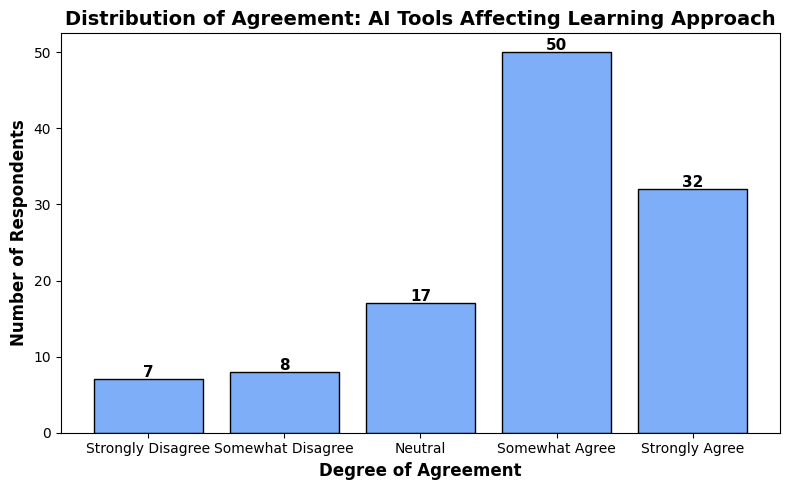

In [106]:
# bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(learning_order, counts, color='#7daef7', edgecolor='black')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3,
             int(bar.get_height()), ha='center', fontweight='bold', fontsize=11)

plt.title('Distribution of Agreement: AI Tools Affecting Learning Approach', fontsize=14, fontweight='bold')
plt.xlabel('Degree of Agreement', fontsize=12, fontweight='bold')
plt.ylabel('Number of Respondents', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

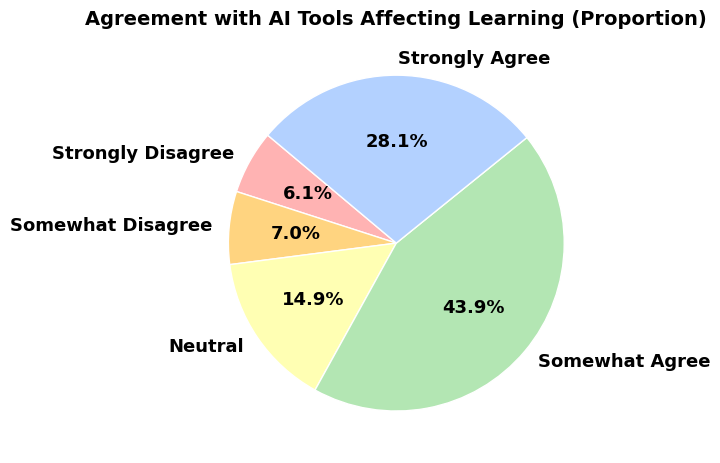

In [107]:
# pie chart
colors = ['#ffb3b3','#ffd480','#ffffb3','#b3e6b3','#b3d1ff']  # One for each Likert category
plt.figure(figsize=(7,7))
plt.pie(
    counts,
    labels=learning_order,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    textprops={'fontsize':13, 'weight':'bold'},
    wedgeprops={'edgecolor':'white'}
)
plt.title('Agreement with AI Tools Affecting Learning (Proportion)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**ENCODING OPINION ON UNDERSTADNING COURSE MATERIAL**

In [108]:
# unique values
df['To what degree do you agree with the following statement? \nAI tools affected your ability to understand course material and learn independently.'].unique()

array(['Strongly Disagree', 'Neutral', 'Strongly Agree', 'Somewhat Agree',
       'Somewhat Disagree'], dtype=object)

In [109]:
# encode second opinion
understand_encoding = {
    'Strongly Agree': 5,
    'Somewhat Agree': 4,
    'Neutral': 3,
    'Somewhat Disagree': 2,
    'Strongly Disagree': 1
}

df['understand_encoding'] = df['To what degree do you agree with the following statement? \nAI tools affected your ability to understand course material and learn independently.'].map(understand_encoding)

In [110]:
# check for missing values
missing = df['understand_encoding'].isnull().sum()
print(f"Missing/unmapped responses: {missing}")
if missing > 0:
    print(df[df['understand_encoding'].isnull()][
        'To what degree do you agree with the following statement?\nAI tools affected your ability to understand course material and understand course assignments.'
    ].unique())

Missing/unmapped responses: 0


In [111]:
# set and reindex ordinal data
degree_understanding_order = [
    'Strongly Disagree', 'Somewhat Disagree', 'Neutral', 'Somewhat Agree', 'Strongly Agree'
]

understanding_vis = df['To what degree do you agree with the following statement? \nAI tools affected your ability to understand course material and learn independently.'].value_counts().reindex(degree_understanding_order, fill_value=0)

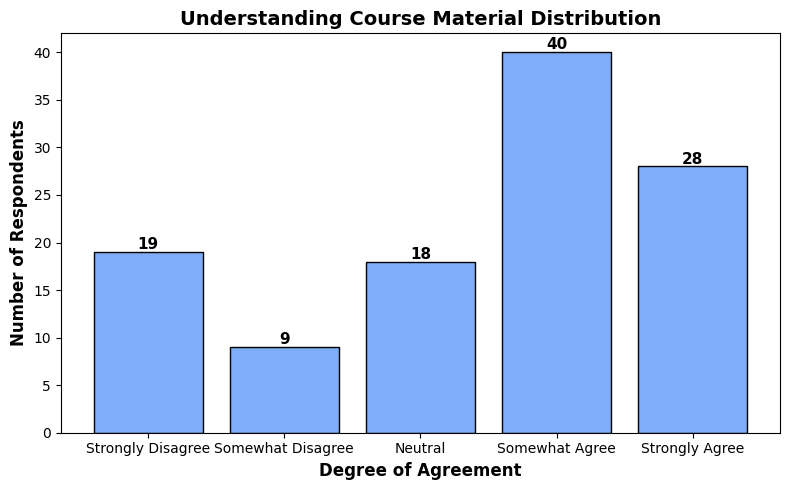

In [112]:
# bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(understanding_vis.index, understanding_vis.values, color='#7daef7', edgecolor='black')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.3, int(bar.get_height()), ha='center', fontweight='bold', fontsize=11)

plt.title('Understanding Course Material Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Degree of Agreement', fontsize=12, fontweight='bold')
plt.ylabel('Number of Respondents', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

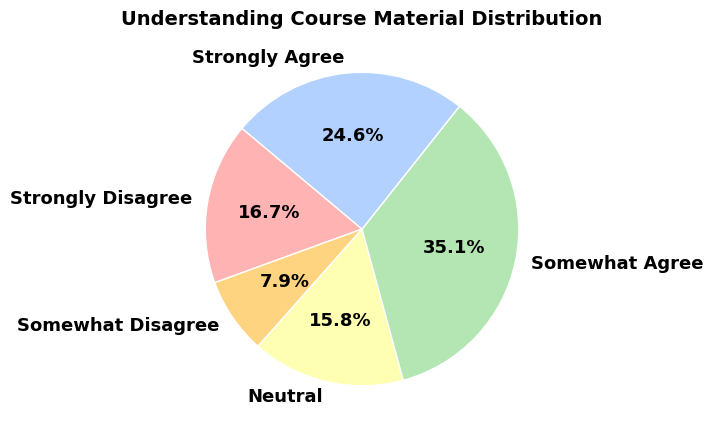

In [113]:
# pie chart
colors = ['#ffb3b3','#ffd480','#ffffb3','#b3e6b3','#b3d1ff']
plt.figure(figsize=(7,7))
plt.pie(
    understanding_vis.values,
    labels=degree_understanding_order,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    textprops={'fontsize':13, 'weight':'bold'},
    wedgeprops={'edgecolor':'white'}
)
plt.title('Understanding Course Material Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

These are all close ended responses, though it is interesting how many different ways these needed to be encoded. For example, questions that allowed students to select more than one option need a different encoding method to accurate reflect the survey data, while making it easy for Python to interpret.

# OPEN ENDED PREPROCESSING

Now that all the close ended questions are handled, more complex methods will be integrated to encode open ended responses.

**RECEIVING PROFESSOR INSTRUCTION ON USING AI IN SCHOOL**

In [114]:
# unique professor instruction values
df['Have you ever received instruction from professors or URI itself about using AI tools for your coursework? If so, please describe the advice or policies you have encountered.'].unique()

array(['Yes, free use of llms to aid me in completing tasks',
       'Yes, for example, use copilot to brainstorm the idea of coding. ',
       'I have been advised from professors that it is a great reference but must not be directly copied.',
       'Most professors I have had are open to AI usage, but generally want students to only use it as a sort of personal tutor, providing feedback and advice to students on how to perform and learn a subject.',
       'AI has not been allowed for initially figuring out problems, but it is allowed for menial tasks (checking code, searching for resources, etc.).',
       'Yes - we are either explicitly banned from using AI, or more commonly we are instructed to provide an AI use statement wherever we used AI tools to assist in our work.',
       'yes in my 305 class we used AI to brainstorm and create UI idea for our app ',
       'Most professor strictly prohibit any use of AI, but I recently took a journalism class in which we were asked to pro

This basic text cleaning will standardize the responses so they are more interpretable.

In [115]:
# necessary imports
import re
import nltk
from nltk.corpus import stopwords

In [116]:
# prepare stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
custom_stopwords = {
    # Generic English stopwords (expandable)
    "i", "me", "my", "we", "us", "our", "you", "your", "they", "them", "their",
    "he", "she", "it", "its", "is", "was", "are", "were", "be", "been", "being",
    "am", "do", "does", "did", "have", "has", "had", "can", "could", "would",
    "should", "will", "shall", "may", "might", "must", "not", "no", "yes", "a",
    "an", "the", "and", "or", "but", "so", "if", "then", "that", "this", "these",
    "those", "of", "to", "in", "on", "at", "for", "with", "as", "by", "from",
    "about", "into", "out", "up", "down", "over", "under", "again", "further",
    "than", "too", "very", "more", "most", "some", "such", "only", "just", "also",
    "even", "though", "although", "still", "while", "when", "where", "which",
    "who", "whom", "whose", "how", "what", "why",

    # Common but irrelevant words for your context
    "class", "classes", "course", "courses", "professor", "professors", "teacher",
    "teachers", "assignment", "assignments", "semester", "school", "student", "students",
    "work", "used", "use", "using", "allows", "allowed", "allow", "told", "tells",
    "said", "says", "taught", "tells", "told", "took", "taking", "help", "helps", "helping",
    "tool", "tools", "one", "two", "three", "four", "five", "lot", "many", "much",
    "thing", "things", "something", "nothing", "anything", "everything",

    # Repetitive or vague survey language
    "ai", "chatgpt", "copilot", "gpt", "llms", "large", "language", "model",
    "etc", "example", "ex", "etc.", "thing", "things", "stuff",
    "kind", "type", "types", "way", "ways",

    # Fillers, hedging
    "probably", "maybe", "sort", "kind", "basically", "generally", "usually",
    "like", "really", "get", "getting", "got", "make", "making", "made",

    # Time/Location references that don’t help
    "last", "past", "now", "then", "before", "after", "currently", "recently",
    "recent", "year", "years", "semester", "term", "month", "week", "day",
    "uconn", "uri", "csc",

    # Other context-specific fluff
    "policy", "policies", "instruction", "instructed", "statement", "statements",
    "response", "responses", "survey", "question", "answer", "tutor", "resource",
    "resources", "feedback", "reference", "references", "cite", "cited", "citing",
    "output", "prompt", "prompts", "detected", "detectors"
}
stop_words.update(custom_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [117]:
# apply stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [118]:
# define cleaning function
def ai_prof_preprocess(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [119]:
# apply cleaning
df['ai_instr_clean'] = df['Have you ever received instruction from professors or URI itself about using AI tools for your coursework? If so, please describe the advice or policies you have encountered.'].apply(ai_prof_preprocess)

In [120]:
# remove extra spaces
df['ai_instr_clean'] = df['ai_instr_clean'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [121]:
# spot check
print(df[['Have you ever received instruction from professors or URI itself about using AI tools for your coursework? If so, please describe the advice or policies you have encountered.', 'ai_instr_clean']].head())

  Have you ever received instruction from professors or URI itself about using AI tools for your coursework? If so, please describe the advice or policies you have encountered.  \
0  Yes, free use of llms to aid me in completing ...                                                                                                                               
1  Yes, for example, use copilot to brainstorm th...                                                                                                                               
2  I have been advised from professors that it is...                                                                                                                               
3  Most professors I have had are open to AI usag...                                                                                                                               
4  AI has not been allowed for initially figuring...                                                

This is the open-ended method of choice for now. Below will be a couple of related visualizations.

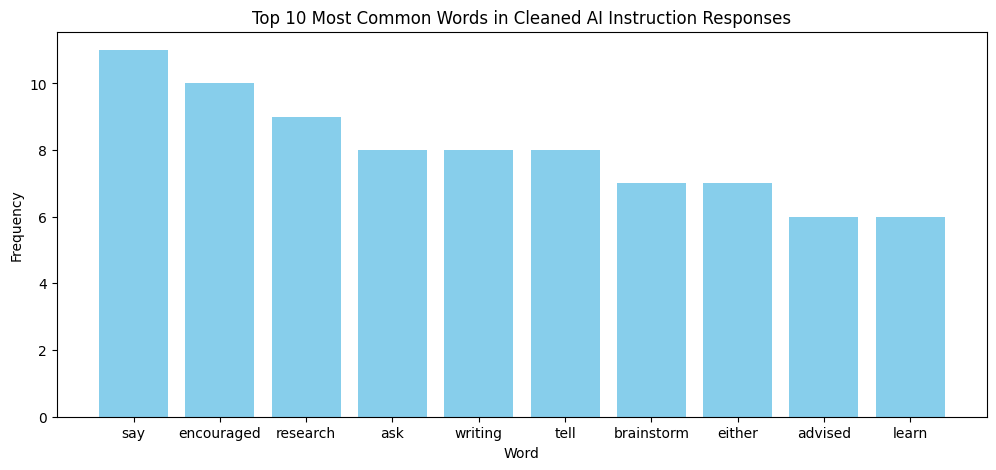

In [122]:
from collections import Counter
import matplotlib.pyplot as plt

# flatten all words into a single list
all_words = ' '.join(df['ai_instr_clean']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(10)

# prepare for plotting
words, counts = zip(*common_words)
plt.figure(figsize=(12,5))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words in Cleaned AI Instruction Responses')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

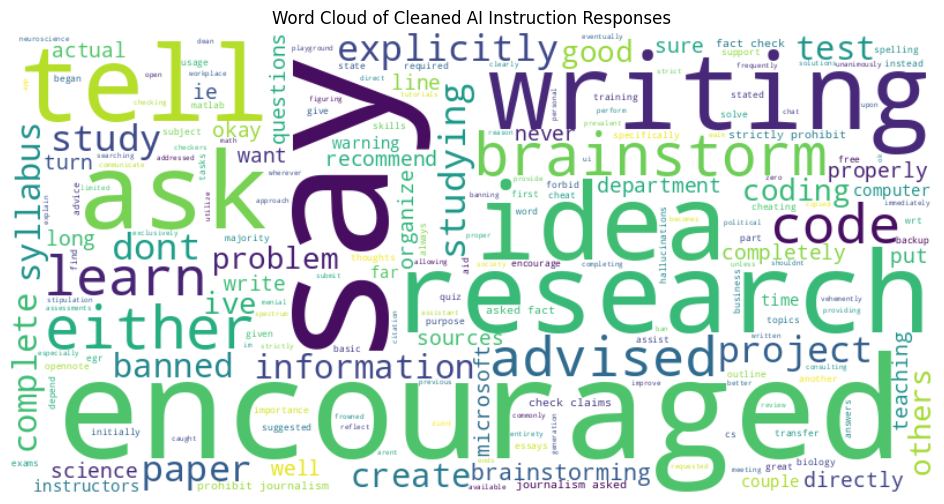

In [123]:
from wordcloud import WordCloud
from collections import Counter

text = ' '.join(df['ai_instr_clean'])

# Check if there is any text left after cleaning and filtering
if not text.strip():
    print("No text remaining after cleaning and filtering for academic integrity responses. Skipping word cloud.")
else:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    # create wordcloud
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Cleaned AI Instruction Responses')
    plt.show()

In [124]:
print(df.shape)

(114, 40)


**OPEN ENDED DESCRIBED BENEFITS AND CHALLENGES**

In [125]:
# benefits / challenges unique responses
df['If you have experienced benefits or challenges, please describe them.'].unique()

array(['Removes the time to write code that is tedious',
       "Sometimes AI's idea is not the most efficient way",
       'Templates and reference creation for starting projects. Condensing information',
       "AI isn't always right, and can sometimes heavily misguide the user with complete nonsense answers.",
       'AI can give decent, general answers to questions that may be too specific to get answers to when doing an internet search. It expedites certain tedious tasks by doing the web-scraping for the user. ',
       'The primary challenge is how pervasive AI has become while also being required to list its use wherever that may be. Thus the line becomes rather grey on what I should count as AI use. Furthermore, I feel rather discouraged from competing with other students in class or aspiring for better grades, as I am under the assumption that a large portion of my classmates are using AI tools to maximize their scores on homework and take-home assignments. I am a slow learner

In [126]:
# prepare stopwords
stop_words_benefits = set(stopwords.words('english'))
custom_stopwords_benefits = {
    # Generic starters
    "i", "i'm", "i’ve", "i've", "i am", "i find", "i use", "i think", "i feel", "i personally",
    "me", "my", "mine", "we", "our", "us", "don't",

    # Common filler and vague terms
    "helpful", "helped", "help", "useful", "use", "used", "using", "benefit", "benefits",
    "challenge", "challenges", "issue", "issues", "problem", "problems", "sometimes", "however",
    "sometimes", "often", "usually", "always", "also", "though", "but", "still", "yet", "very",
    "lot", "many", "much", "more", "most", "some", "few", "just", "even", "well",

    # AI-specific generalities
    "ai", "chatgpt", "chat", "gpt", "gemini", "dall-e", "midjourney", "tools", "tool", "system",
    "systems", "platform", "platforms", "google", "quizlet", "grammarly", "canva", "AI", "AI's",
    "ais",

    # Common educational terms (broad & repetitive)
    "student", "students", "professor", "professors", "teacher", "teachers", "assignment",
    "assignments", "class", "classes", "course", "courses", "homework", "school", "university",
    "education", "study", "studying", "learning", "research", "paper", "papers", "essay", "essays",
    "test", "tests", "quiz", "quizzes", "problem", "problems", "concept", "concepts", "content",
    "benefit", "challenge", "benefits", "challenges",

    # Generic tech/academic terms
    "code", "coding", "script", "scripts", "module", "modules", "terraform", "aws",
    "debug", "debugging", "solution", "solutions", "topic", "topics", "information",
    "data", "explain", "explanation", "explained", "break down", "breakdown",
    "question", "questions", "answer", "answers",

    # Non-informative sentiment or opinion expressions
    "good", "bad", "right", "wrong", "correct", "incorrect", "efficient", "inefficient",
    "beneficial", "amazing", "great", "awesome", "fast", "slow", "better", "worse",
    "positive", "negative", "useful", "useless", "accurate", "inaccurate",

    # Transitional and conversational phrases
    "that being said", "on that note", "for example", "e.g.", "such as", "versus", "vs",
    "etc", "and so on", "as well as", "in order to", "at the end of the day", "to be honest",
    "honestly", "basically", "essentially", "kind of", "sort of",

    # Environmental/political filler
    "environment", "expensive", "water", "waste", "cost", "capitalism", "greed", "agenda",

    # Empty responses
    "", " ", ".", ",", "-", "—", "\n"
}

In [127]:
# define cleaning function
stop_words_benefits = set(stopwords.words('english')).union(custom_stopwords_benefits)
def ai_benefit_preprocess(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words_benefits]
    return ' '.join(tokens)

In [128]:
# apply cleaning
df['ai_benefit_clean'] = df['If you have experienced benefits or challenges, please describe them.'].apply(ai_benefit_preprocess)

In [129]:
# remove extra spaces
df['ai_benefit_clean'] = df['ai_benefit_clean'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [130]:
# spot check
print(df[['If you have experienced benefits or challenges, please describe them.', 'ai_benefit_clean']].head())

  If you have experienced benefits or challenges, please describe them.  \
0     Removes the time to write code that is tedious                      
1  Sometimes AI's idea is not the most efficient way                      
2  Templates and reference creation for starting ...                      
3  AI isn't always right, and can sometimes heavi...                      
4  AI can give decent, general answers to questio...                      

                                    ai_benefit_clean  
0                         removes time write tedious  
1                                           idea way  
2  templates reference creation starting projects...  
3       isnt heavily misguide user complete nonsense  
4  give decent general may specific get internet ...  


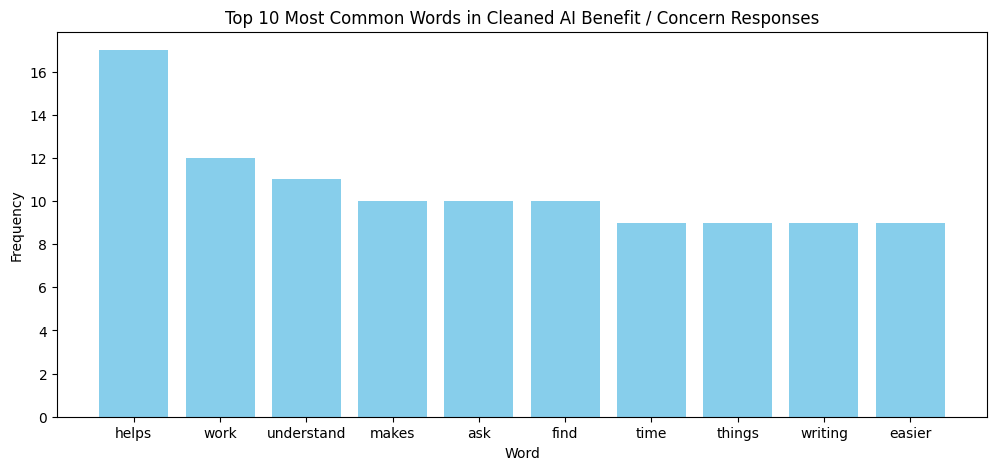

In [131]:
from collections import Counter
import matplotlib.pyplot as plt

# flatten all words into a single list
all_words = ' '.join(df['ai_benefit_clean']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(10)

# prepare for plotting
words, counts = zip(*common_words)
plt.figure(figsize=(12,5))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words in Cleaned AI Benefit / Concern Responses')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

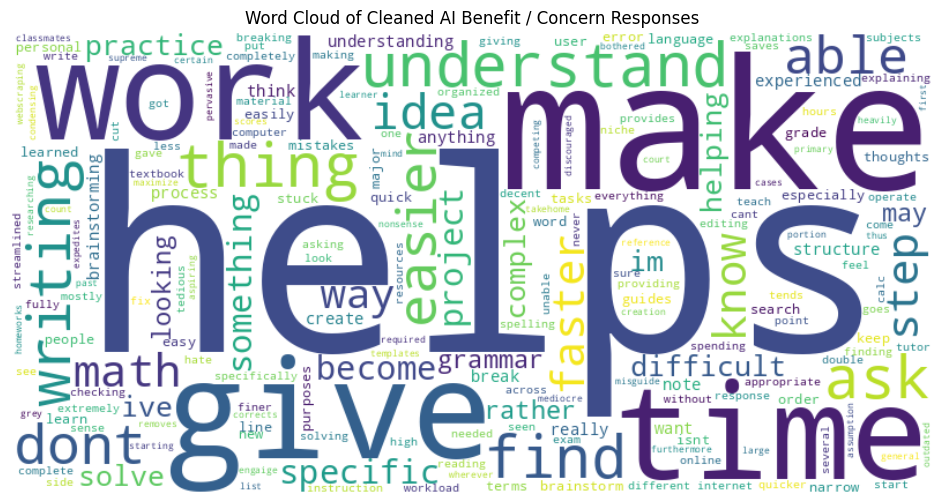

In [132]:
from wordcloud import WordCloud
from collections import Counter # Import Counter

text = ' '.join(df['ai_benefit_clean'])

if not text.strip():
    print("No text remaining after cleaning and filtering for academic integrity responses. Skipping word cloud.")
else:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    # create wordcloud
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Cleaned AI Benefit / Concern Responses')
    plt.show()

**NOTICEABLE IMPACT ON ACADEMIC INTEGRITY**

In [133]:
# unique values for academic integrity open ended question
df['Have you noticed any impact on your academic integrity or ethical considerations when using AI tools? Please explain.'].unique()

array(["No, I don't use AI", 'No',
       'It can make it very easy to miss course material or you do not understand it without the help of the ai. Writing skills can diminish if you rely on ai to write everything.',
       'I believe so, sometimes with how accessible AI is, I get lazy and make it do my homework instead of me doing it. Usually I keep this to math homework, basically using it as a calculator with extra steps. I do believe it impacts my learning as it prevents me from struggling, which is a necessary component to understanding material fully.',
       'I have not because AI merely summarizes what I could find on my own. I do not have AI solve problems for me. Even if I wanted it to solve problems, it usually does incorrect work. ',
       'I am a bit stubborn and do genuinely enjoy learning, so I always give an honest effort into my assignments and coursework first. However, I have noticed that my grades, which have remained relatively stable, are trending lower and lowe

In [134]:
import re
stop_words_integrity = set(stopwords.words('english'))
custom_stopwords_integrity = {
    # Standard filler and structure words
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves",
    "you", "your", "yours", "yourself", "yourselves", "he", "him",
    "his", "himself", "she", "her", "hers", "herself", "it", "its",
    "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those",
    "am", "is", "are", "was", "were", "be", "been", "being", "have",
    "has", "had", "having", "do", "does", "did", "doing", "a", "an",
    "the", "and", "but", "if", "or", "because", "as", "until", "while",
    "of", "at", "by", "for", "with", "about", "against", "between",
    "into", "through", "during", "before", "after", "above", "below",
    "to", "from", "up", "down", "in", "out", "on", "off", "over",
    "under", "again", "further", "then", "once", "here", "there",
    "when", "where", "why", "how", "all", "any", "both", "each",
    "few", "more", "most", "other", "some", "such", "no", "nor",
    "not", "only", "own", "same", "so", "than", "too", "very",
    "can", "will", "just", "don", "should", "now", "dont", "like",

    # Context-specific to AI/academic reflection filler
    "use", "using", "used", "uses", "ai", "chatgpt", "gpt", "gemini", "tools",
    "tool", "assignment", "assignments", "class", "classes", "course", "courses",
    "work", "school", "homework", "project", "projects", "paper", "papers",
    "professor", "professors", "teacher", "teachers", "student", "students",
    "college", "uri", "university", "major", "learning", "learn", "understand",
    "understanding", "material", "topic", "topics", "concept", "concepts",
    "resource", "resources", "thing", "things", "yes",

    # Meta/reflection words
    "think", "feel", "felt", "believe", "know", "noticed",
    "sometimes", "often", "rarely", "usually", "always", "never",
    "lot", "bit", "much", "many", "somewhat", "still", "personally",
    "honestly", "however", "though", "really", "sure", "yes",

    # Education-related filler
    "quiz", "quizzes", "exam", "exams", "grade", "grades", "syllabus", "gpa",
    "score", "points", "submission", "submit", "submitting", "due", "turn",
    "turned", "test", "tests", "teacher", "professor", "assignment", "assignments",

    # Time references
    "now", "then", "later", "before", "after", "recently", "today",
    "semester", "week", "weeks", "month", "months", "year", "years",

    # Neutral verbs/adverbs not useful for trends
    "get", "got", "make", "made", "doing", "done", "go", "went", "come",
    "came", "see", "seen", "look", "looking", "take", "taking", "find",
    "found", "give", "gave", "help", "helped", "helps", "helping",
    "try", "tried", "trying", "start", "started", "starting", "would",

    # Modifiers that don’t add topical value
    "good", "bad", "better", "best", "worse", "important", "big",
    "small", "easy", "easier", "hard", "harder", "difficult", "simple",
    "fast", "slow", "quick", "quickly", "time", "times", "lot", "loads",

    # Punctuation & artifacts
    "", ".", ",", "“", "”", "\"", "\"", "’", "–", "-", "—", "\n",

    # Redundant common sense pairs
    "ethical", "ethics", "integrity", "impact", "consideration", "considerations"
}
stop_words_integrity.update(custom_stopwords_integrity)

In [135]:
# cleaning function
def integrity_preprocess(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words_integrity]
    return ' '.join(tokens)

In [136]:
# apply cleaning to data
df['ai_integrity_clean'] = df['Have you noticed any impact on your academic integrity or ethical considerations when using AI tools? Please explain.'].apply(integrity_preprocess)

In [137]:
# remove extra spaces
df['ai_integrity_clean'] = df['ai_integrity_clean'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [138]:
# spot check
for i in range(5):
    print("Original:", df['Have you noticed any impact on your academic integrity or ethical considerations when using AI tools? Please explain.'].iloc[i])
    print("Cleaned: ", df['ai_integrity_clean'].iloc[i])
    print("------")

Original: No, I don't use AI
Cleaned:  
------
Original: No
Cleaned:  
------
Original: It can make it very easy to miss course material or you do not understand it without the help of the ai. Writing skills can diminish if you rely on ai to write everything.
Cleaned:  miss without writing skills diminish rely write everything
------
Original: I believe so, sometimes with how accessible AI is, I get lazy and make it do my homework instead of me doing it. Usually I keep this to math homework, basically using it as a calculator with extra steps. I do believe it impacts my learning as it prevents me from struggling, which is a necessary component to understanding material fully.
Cleaned:  accessible lazy instead keep math basically calculator extra steps impacts prevents struggling necessary component fully
------
Original: I have not because AI merely summarizes what I could find on my own. I do not have AI solve problems for me. Even if I wanted it to solve problems, it usually does inc

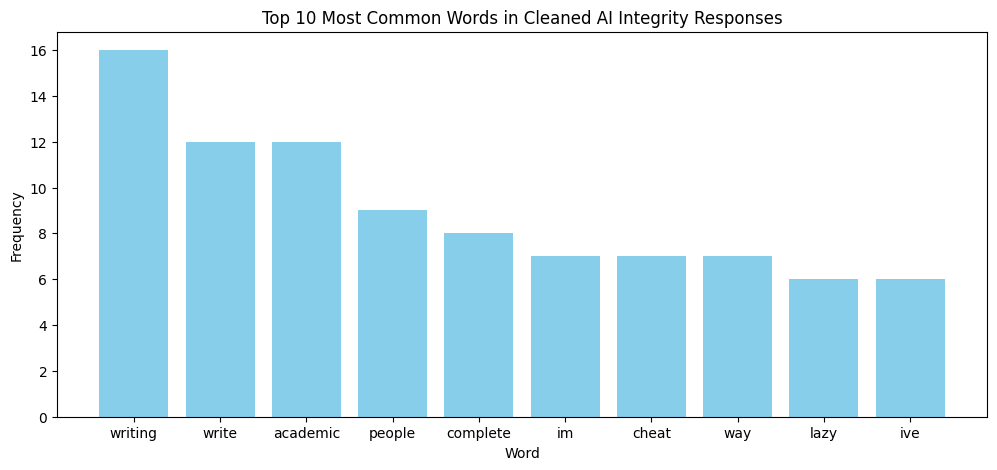

In [139]:
# flatten all words
all_words_integrity = ' '.join(df['ai_integrity_clean']).split()
word_freq_integrity = Counter(all_words_integrity)
common_words_integrity = word_freq_integrity.most_common(10)

# prepare for plotting
words_integrity, counts_integrity = zip(*common_words_integrity)
plt.figure(figsize=(12,5))
plt.bar(words_integrity, counts_integrity, color='skyblue')
plt.title('Top 10 Most Common Words in Cleaned AI Integrity Responses')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

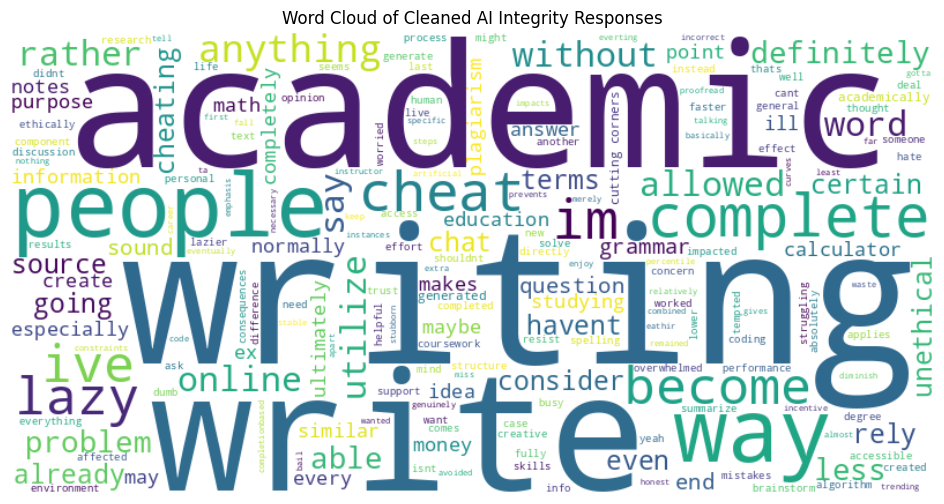

In [140]:
# create wordcloud
text_integrity = ' '.join(df['ai_integrity_clean'])

plt.figure(figsize=(12,6))
wordcloud_integrity = WordCloud(width=800, height=400, background_color='white').generate(text_integrity)
plt.imshow(wordcloud_integrity, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned AI Integrity Responses')
plt.show()

In [141]:
print(df.shape)

(114, 42)


**CLEANING DATA REGARDING AI TOOLS SUGGESTIONS OR CONCERNS**

In [142]:
# unique values
df['What suggestions or concerns do you have about AI tools being integrated into education?'].unique()

array(["It can be difficult to measure a student's understanding of material particularly in computer science",
       "Use as a tool or don't use it",
       'Base skills such as reading and writing wont be trained as hard since ai can assist.',
       'I believe with the usage of AI increasing, there should be more physical inperson engagement when it comes to learning, or engagement towards using more real world examples for solving problems. AI tends to be really bad at intepretting scenario based problems when it comes to math or CS, so I think making problems about real world scenarios would benefit students a lot as it makes them more engaged into the material, having them actually have to read what the problem is saying and fully understand what is going on. I also think for STEM majors there should be more project based learning, which necessitates self expression. ',
       'Educational level determines the impact of AI. Anything from kindergarten to potentially freshman or s

In [143]:
# prepare suggestions / concerns stopwords
stop_words_suggestions = set(stopwords.words('english'))
custom_stopwords_suggestions = {
    # Common vague/general verbs & phrases
    "think", "feel", "believe", "know", "wish", "want", "say", "saying", "said",
    "concern", "concerns", "suggest", "suggestions", "idea", "ideas",
    "recommend", "recommendation", "recommendations", "use", "used", "using",
    "uses", "going", "people", "make", "makes", "made", "doing", "do", "done",
    "did", "get", "got", "give", "gave", "have", "has", "had", "need",
    "needs", "needed", "should", "would", "could", "can", "may", "might",
    "will", "must",

    # Filler or reflection phrasing
    "personally", "honestly", "just", "actually", "really", "very", "so",
    "maybe", "probably", "definitely", "totally", "somehow", "somewhat",
    "kind of", "sort of", "still", "often", "sometimes", "always", "never",
    "usually", "ever", "already", "also",

    # AI reference overuse
    "ai", "artificial", "intelligence", "chatgpt", "gpt", "generative", "tool",
    "tools", "llm", "technology", "technologies", "system", "systems",
    "platform", "platforms",

    # Education context redundancy
    "student", "students", "teacher", "teachers", "professor", "professors",
    "assignment", "assignments", "exam", "exams", "test", "tests", "homework",
    "class", "classes", "course", "courses", "school", "education", "learning",
    "studying", "grade", "grades", "paper", "papers", "project", "projects",

    # Generic academic/future references
    "future", "career", "job", "jobs", "life", "lives", "world", "society",
    "generation", "college", "university", "uri", "pre-med", "pre-vet",

    # Overused general nouns/adjectives
    "thing", "things", "stuff", "person", "everyone", "anyone",
    "someone", "nothing", "everything", "something", "issue", "issues",
    "problem", "problems", "point", "way", "extent", "time", "times", "place",
    "situation", "good", "bad", "better", "best", "scary", "danger",
    "dangerous", "important", "big", "small", "helpful", "useful", "harmful",
    "wrong", "right", "ethical", "unethical", "moral", "morals",

    # Expressions or filler statements (multi-word!)
    "i think", "i believe", "i feel", "i know", "in my opinion", "i would say",
    "at least", "as long as", "as a future", "from my experience",
    "in the future", "that being said", "with that said", "come on", "hold on",
    "to some extent", "to an extent",

    # Redundant meta language
    "concerned", "scared", "worried", "afraid", "fear", "fearful",
    "cheating", "cheat", "cheats", "cheated", "plagiarism", "false", "falsely",

    # Policy and general system references
    "rule", "rules", "policy", "policies", "regulation", "regulations", "law",
    "laws",

    # Misuse repetition
    "rely", "relying", "depend", "depending", "abuse", "abusing", "overuse",
    "overusing",

    # Empty & punctuation
    "", " ", ".", ",", "’", "“", "”", "'", "\"", "-", "—", "\n"
}
stop_words_suggestions.update(custom_stopwords_suggestions)

In [144]:
# define cleaning function
def ai_suggestions_preprocess(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words_suggestions]
    return ' '.join(tokens)

In [145]:
# apply cleaning
df['ai_suggestions_clean'] = df["What suggestions or concerns do you have about AI tools being integrated into education?"].apply(ai_suggestions_preprocess)

In [146]:
# remove extra spaces
df['ai_suggestions_clean'] = df['ai_suggestions_clean'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [147]:
# spot check
for i in range(5):
    print("Original:", df["What suggestions or concerns do you have about AI tools being integrated into education?"].iloc[i])
    print("Cleaned: ", df['ai_integrity_clean'].iloc[i])
    print("------")

Original: It can be difficult to measure a student's understanding of material particularly in computer science
Cleaned:  
------
Original: Use as a tool or don't use it
Cleaned:  
------
Original: Base skills such as reading and writing wont be trained as hard since ai can assist.
Cleaned:  miss without writing skills diminish rely write everything
------
Original: I believe with the usage of AI increasing, there should be more physical inperson engagement when it comes to learning, or engagement towards using more real world examples for solving problems. AI tends to be really bad at intepretting scenario based problems when it comes to math or CS, so I think making problems about real world scenarios would benefit students a lot as it makes them more engaged into the material, having them actually have to read what the problem is saying and fully understand what is going on. I also think for STEM majors there should be more project based learning, which necessitates self expression.

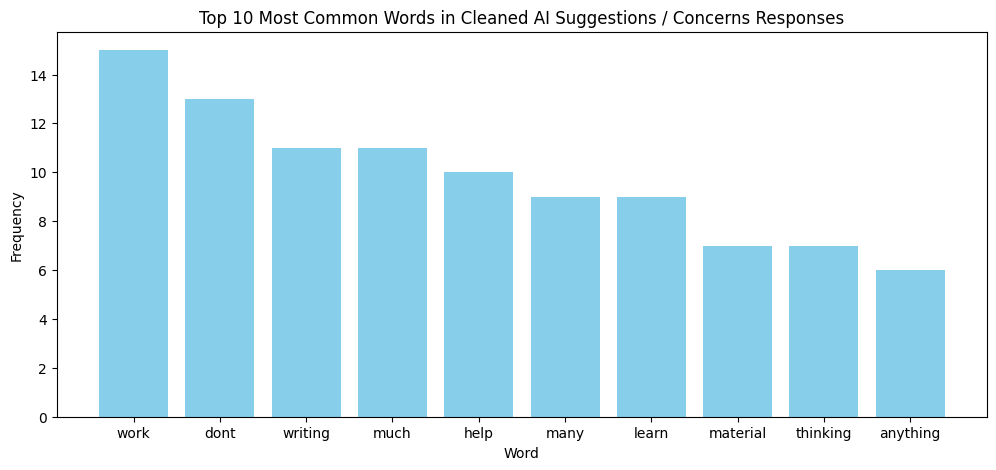

In [148]:
# flatten all words into single list
all_words_suggestions = ' '.join(df['ai_suggestions_clean']).split()
word_freq_suggestions = Counter(all_words_suggestions)
common_words_suggestions = word_freq_suggestions.most_common(10)

# prepare for plotting
words, counts = zip(*common_words_suggestions)
plt.figure(figsize=(12,5))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words in Cleaned AI Suggestions / Concerns Responses')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

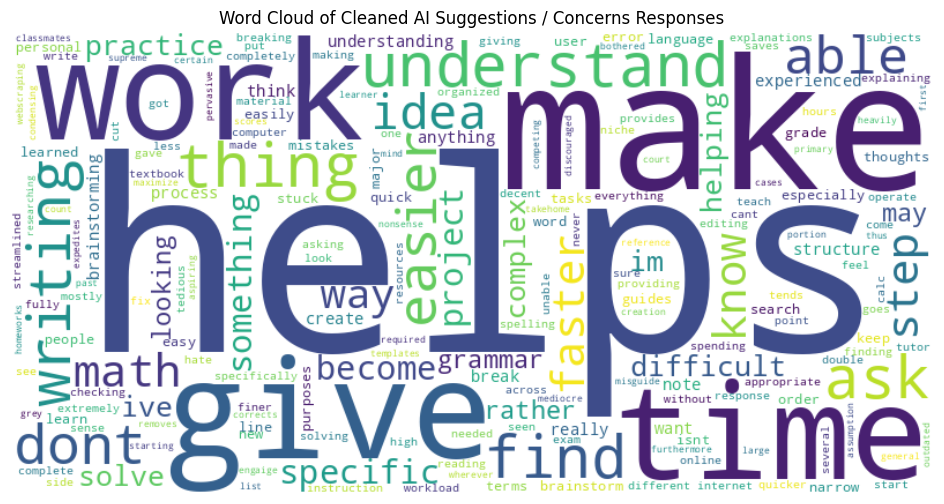

In [149]:
# create wordcloud
text_suggestions = ' '.join(df['ai_suggestions_clean'])

plt.figure(figsize=(12,6))
wordcloud_suggestions = WordCloud(width=800, height=400, background_color='white').generate(text_suggestions)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned AI Suggestions / Concerns Responses')
plt.show()

In [150]:
print(df.shape)

(114, 43)


**CLEANING OPEN STUDENT OPINIONS AND EXPERIENCE RESPONSES**

In [151]:
df['Is there anything else you would like to share about your opinions and experiences regarding AI tools and student learning?'].unique()

array(['', 'No',
       'In high level topics like computer science, ai will give you an answer even if it is not correct',
       'Students should use AI only when they already understand the material. Its okay to use it to take out all the busy work from your workload, but you have to actually understand what its doing. its like if taking out the trash was automated, itd be nice to have a machine do it for you, but you should understand why the machine throws glass in the recycling bin and not the trash bin.',
       'I think AI might be more concerning for students who graduate. At least some industry jobs seem much simpler than higher level CS, physics, or math classes in college. AI could threaten these jobs.',
       'AI definitely will have some place in education, I think it can be an excellent tool for brainstorming, but I still think it should be avoided completely and strictly prohibited in education.',
       "It's nice to bounce small coding issues off a chatbot, as it's k

In [152]:
# stop words for open ended opinions
stop_words_opinions = set(stopwords.words('english'))
custom_stopwords_opinions = {
    # Filler or vague starters
    "i think", "i believe", "i feel", "in my opinion", "just", "actually", "honestly",
    "personally", "it's okay", "it's not like", "i don’t like", "i like",
    "not everyone", "not all", "i'm sorry", "thank you", "thanks", "no", "none",
    "none in particular", "i hope", "i have too much to say",
    "i don't really have much else to say", "use", "used",

    # Overused AI references
    "ai", "artificial intelligence", "generative ai", "chatgpt", "tools",
    "tool", "these tools", "ai tools", "machine", "systems", "platform", "platforms",

    # Common educational context
    "students", "student", "teacher", "teachers", "university", "college", "school",
    "education", "learning", "courses", "course", "assignments", "assignment",
    "class", "classes", "credits", "material", "professor", "professors",

    # Redundant academic references
    "cs", "computer science", "math", "science", "physics",

    # Broad social commentary
    "world", "society", "the future", "future", "generation", "we're cooked",
    "we are cooked", "get left behind", "bad reputation", "corporate greed",
    "capitalism", "mass surveillance", "agenda", "palantir",

    # Generic statements or overused sentiments
    "ai is helpful", "ai is powerful", "ai is the future", "ai has changed the world",
    "super human capabilities", "easier and easier", "it can be used",
    "it should be", "it shouldn't be", "should be avoided", "it’s difficult to regulate",
    "has helped me", "helped me learn", "learn how to use", "it can and will",
    "humans will lead themselves into destruction", "this is part of their agenda",
    "i always say please and thank you", "its only a matter of time",

    # Misused or shallow ethical claims
    "integrity", "cheating", "cheat", "cheated", "abuse", "abused", "using it to cheat",

    # Misc/empty punctuation
    "", " ", ".", ",", "’", "“", "”", "'", "\"", "-", "—", "\n"
}
stop_words_opinions.update(custom_stopwords_opinions)

In [153]:
# define cleaning function
stop_words_opinions = set(stopwords.words('english'))
stop_words_opinions.update(custom_stopwords_opinions)

def ai_opinions_preprocess(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words_opinions]  # <-- FIXED HERE
    return ' '.join(tokens)

In [154]:
# apply cleaning
df['ai_opinions_clean'] = df['Is there anything else you would like to share about your opinions and experiences regarding AI tools and student learning?'].apply(ai_opinions_preprocess)

In [155]:
# remove extra spaces
df['ai_opinions_clean'] = df['ai_opinions_clean'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [156]:
# spot check
for i in range(5):
    print("Original:", df['Is there anything else you would like to share about your opinions and experiences regarding AI tools and student learning?'].iloc[i])
    print("Cleaned: ", df['ai_opinions_clean'].iloc[i])
    print("------")

Original: 
Cleaned:  
------
Original: No
Cleaned:  
------
Original: In high level topics like computer science, ai will give you an answer even if it is not correct
Cleaned:  high level topics like computer give answer even correct
------
Original: Students should use AI only when they already understand the material. Its okay to use it to take out all the busy work from your workload, but you have to actually understand what its doing. its like if taking out the trash was automated, itd be nice to have a machine do it for you, but you should understand why the machine throws glass in the recycling bin and not the trash bin.
Cleaned:  already understand okay take busy work workload understand like taking trash automated itd nice understand throws glass recycling bin trash bin
------
Original: I think AI might be more concerning for students who graduate. At least some industry jobs seem much simpler than higher level CS, physics, or math classes in college. AI could threaten these jo

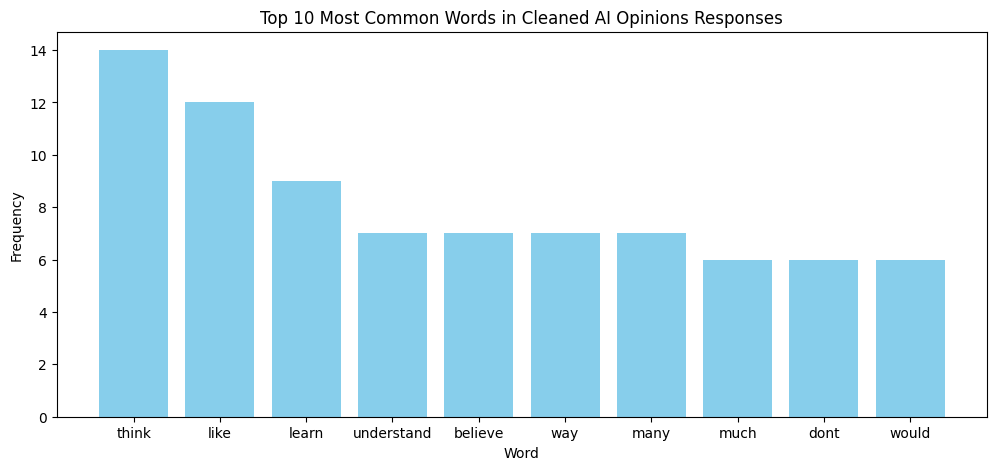

In [157]:
# flatten all words
all_words_opinions = ' '.join(df['ai_opinions_clean']).split()
word_freq_opinions = Counter(all_words_opinions)
common_words_opinions = word_freq_opinions.most_common(10)

# prepare for plotting
words, counts = zip(*common_words_opinions)
plt.figure(figsize=(12,5))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words in Cleaned AI Opinions Responses')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

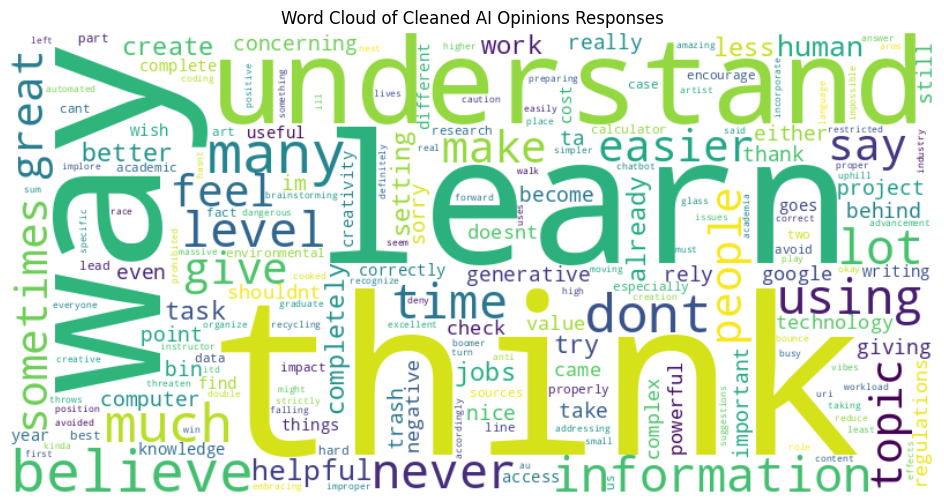

In [158]:
# creating wordcloud
text_opinions = ' '.join(df['ai_opinions_clean'])

plt.figure(figsize=(12,6))
wordcloud_opinions = WordCloud(width=800, height=400, background_color='white').generate(text_opinions)
plt.imshow(wordcloud_opinions, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned AI Opinions Responses')
plt.show()

In [159]:
print(df.shape)

(114, 44)


The method used to encode open ended responses is observably consistent between each column. With that being said, this marks the end of the data preprocessing, with all 17 rows effectively encoded and cleaned. Now, this can be used to suggest findings in the survey data.

# Pattern Emergence

At this point, every single column is accounted for in cleaning. Since everything is interpretable my python, now everything can potentially be applied to finding distinct patterns in data. This section will be primiarly dedicated to visualizations and basic, effective machine learning practices.

**GENERAL PATTERNS FROM RESPONSES**

1. AI tool use is widely recognizable to students both in concept and practice.

*   Nearly every respondent are aware of AI tools and almost all of them have tried at least one tool
*   Even students that are less that familiar with these tools have some exposure
*   The frequency in which students use these tools varies widely; daily engagement to occasional, some use AI tools for specific academic tasks and some have integrated it into generic study routines

In [160]:
print(df['familiarity_category'].unique())

['Slightly Familiar' 'Very Familiar' 'Quite Familiar' 'Somewhat Familiar']


In [161]:
category_labels = ['Slightly Familiar', 'Somewhat Familiar', 'Quite Familiar', 'Very Familiar']

In [162]:
counts = df['familiarity_category'].value_counts().reindex(category_labels, fill_value=0)
print(counts)

familiarity_category
Slightly Familiar    44
Somewhat Familiar    25
Quite Familiar       23
Very Familiar        22
Name: count, dtype: int64


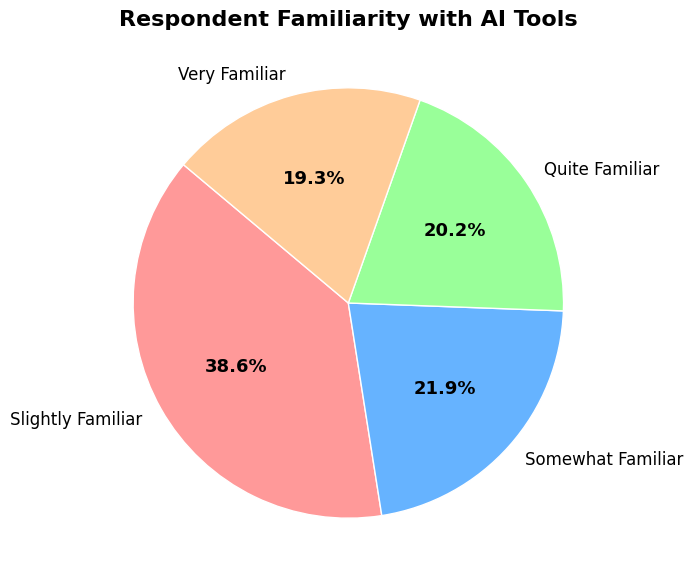

In [163]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']  # Or your preferred palette

plt.figure(figsize=(7,7))
patches, texts, autotexts = plt.pie(
    counts,
    labels=category_labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'white'}
)
plt.setp(autotexts, size=13, weight='bold')
plt.title('Respondent Familiarity with AI Tools', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

2. Typical Purposes of AI tool use ranges

*   Some of the most adopted academic utilities from AI include the following:
    1. Studying (summarizing notes, creating study guides, explaining practice problems)
    2. Writing (proofreading, brainstorming, essay structure)
    3. Research (brainstorming project ideas, finding information)  

*   Some students specifically use AI only for mundane or repetitive tasks
*   Some students rely on AI tools to explain complex concepts





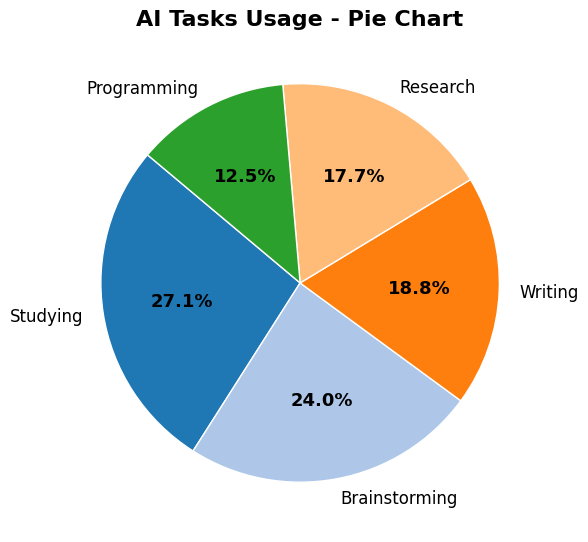

In [164]:
# pie chart for tool tasks
plt.figure(figsize=(6, 6))
colors = plt.get_cmap('tab20').colors[:len(filtered_task_counts)]
patches, texts, autotexts = plt.pie(
    filtered_task_counts.values,
    labels=filtered_task_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'white'}
)
plt.setp(autotexts, size=13, weight='bold')
plt.title('AI Tasks Usage - Pie Chart', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

3. Variety of perceived benefits


*   One of the most common responses towards this topic include that AI can perform tedious tasks much faster than a student can; this allows students to focus on more time consuming and difficult components of their classwork
*   Students praise Generative AI's ability to explain a vast amount of concepts in varying degrees of detail; this has garnered the student notion that it can be a "24/7 tutor"
*   Some students appreciate the potential of AI to help with skills that are not typically reinforced in college level classes (i.e. grammar with Grammarly)



4. Variety of listed challenges and concerns


*   One prominent student concern is that AI can provide information is either incorrect or misleading; the other hand of Generative AI explaining sophisticated topics is that these types of questions are most likely to be misinformed
*   Some students worry that the embrace of AI in student learning has directly contributed to the erosion of ethical norms and considerations in student learning
    1.   Students may become overly reliant on these platforms which has a diminishing impact on critical thinking and problem solving skills
    2.   Students may believe that others are inherently using AI to frauduently complete classwork and assignments





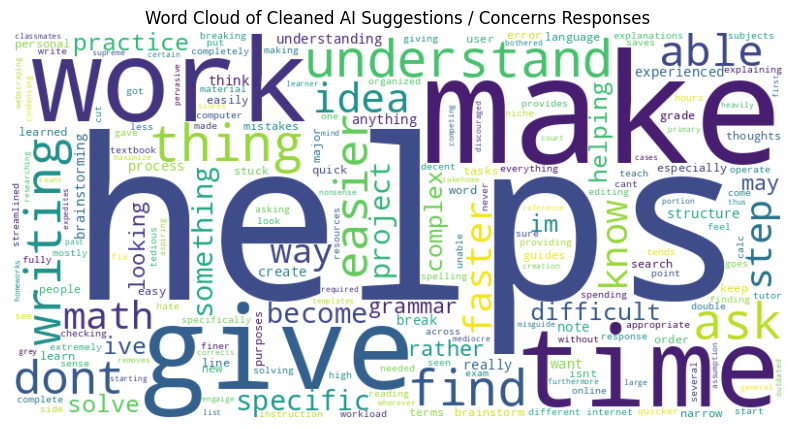

In [165]:
# create wordcloud
text_suggestions = ' '.join(df['ai_suggestions_clean'])

plt.figure(figsize=(10,6))
wordcloud_suggestions = WordCloud(width=800, height=400, background_color='white').generate(text_suggestions)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned AI Suggestions / Concerns Responses')
plt.show()

5. Students are confused by Professor's instruction of AI policies


*   Student experience regarding professional enforcement of AI tools is largely inconsistent
    *   Some professors willingly encourage AI use for specific assignments, while others may provide strict prohibitions for using these tools
    *   Some professors allow AI for brainstorming and research but are not allowed for assignment completion
*   Common student sentiment indicates that clearer and more consistent instruction on how to use AI tools in educational settings would lessen their worry about ethical concerns

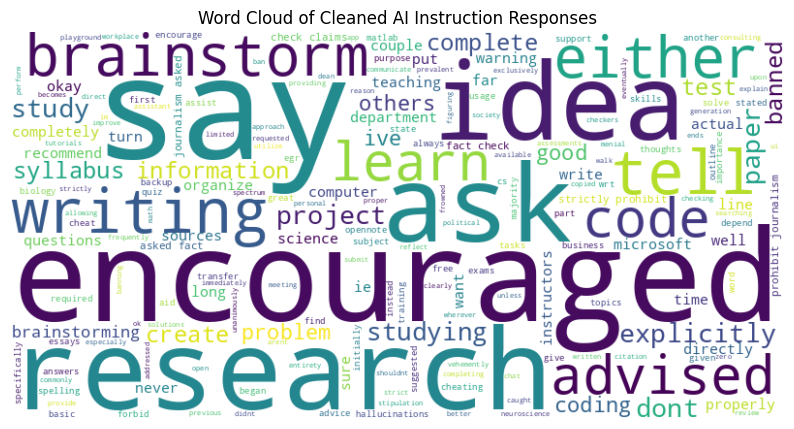

In [166]:
from wordcloud import WordCloud
from collections import Counter

text = ' '.join(df['ai_instr_clean'])

# Check if there is any text left after cleaning and filtering
if not text.strip():
    print("No text remaining after cleaning and filtering for academic integrity responses. Skipping word cloud.")
else:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    # create wordcloud
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Cleaned AI Instruction Responses')
    plt.show()

6. STEM majors use AI more frequently than non-STEM majors

*   Not only do STEM students use AI tools more, but also use a greater variety of tools
*   Non-STEM students primarily use these tools for writing or brainstorming purposes; STEM students most often use these tools for technical tasks (i.e. explaining complex concepts, programming)
*   Upperclassmen and graduate students approach AI tools in more nuanced AI tool use or provide more critical perspectives; Freshman and Sophomores describe more limited or experimental approachs with their use

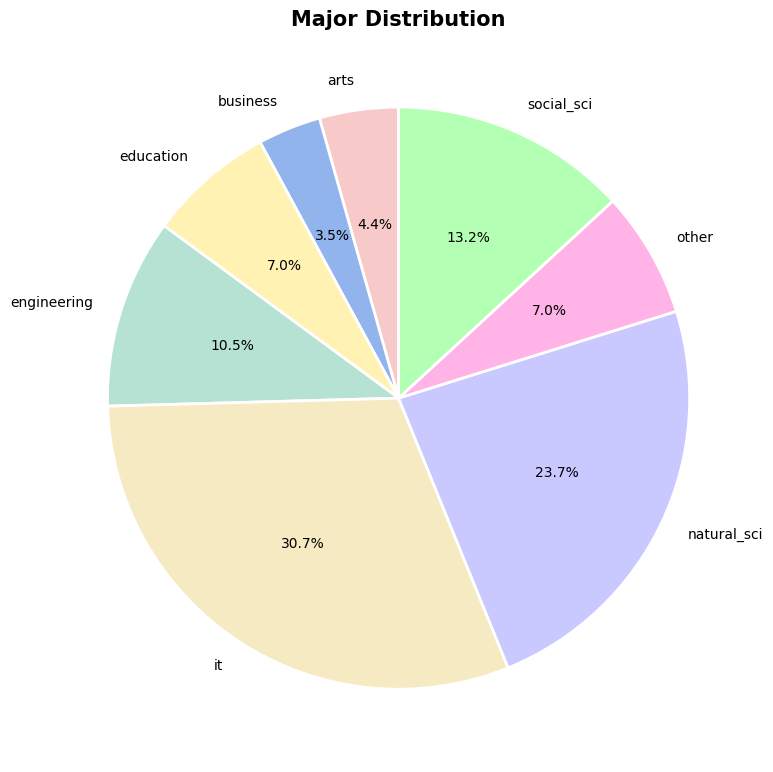

In [167]:
# soft pastel
colors = ['#f7cac9', '#92b4ec', '#fff2b2', '#b6e2d3', '#f6eac2', '#c9c9ff', '#ffb3e6', '#b3ffb3'] # Added colors for all major categories

# personal modifications
grade_counts_major = df['major_category'].value_counts().sort_index()
labels_major = grade_counts_major.index
sizes_major = grade_counts_major.values

# pie chart of major distribution
plt.figure(figsize=(8, 8))
plt.pie(
    sizes_major,
    labels=labels_major,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
plt.title(f'Major Distribution', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

Many of these repeated, basic visualizations provide relevant context about the information at hand. The next step to unlock further important insights is to use encoded data and compare the relationships between 2 or 3 different features. This would provide more reasoning behind the general findings.

# More Comprehensive Deep Dives

**GENDER USE OF AI TOOLS**

Demographic data collected in the survey will serve as an important basis of comparison when determining discrpencies in AI tool use. First, there will be a displayed visualization to find the difference in how much AI tools are being used by each gender.

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
# mapping for plot labels
gender_map = {1: 'Male', 2: 'Female', 3: 'Non-Binary'}
frequency_map = {
    0: 'Never or Rarely',
    1: 'Monthly or Less',
    2: 'Weekly',
    3: 'Daily or More'
}
# more readable labels
df['gender'] = df['gender_encoded'].map(gender_map)
df['frequency'] = df['frequency_encoded'].map(frequency_map)

In [170]:
# set both orders
gender_order = ['Male', 'Female', 'Non-Binary']
frequency_order = ['Never or Rarely', 'Monthly or Less', 'Weekly', 'Daily or More']

In [171]:
# compute crosstab between features
ct_genfreq = pd.crosstab(
    df['gender'],
    df['frequency']
).reindex(index=gender_order, columns=frequency_order, fill_value=0)

In [172]:
# normalize to compare features
ct_genfreq_norm = ct_genfreq.div(ct_genfreq.sum(axis=1), axis=0)

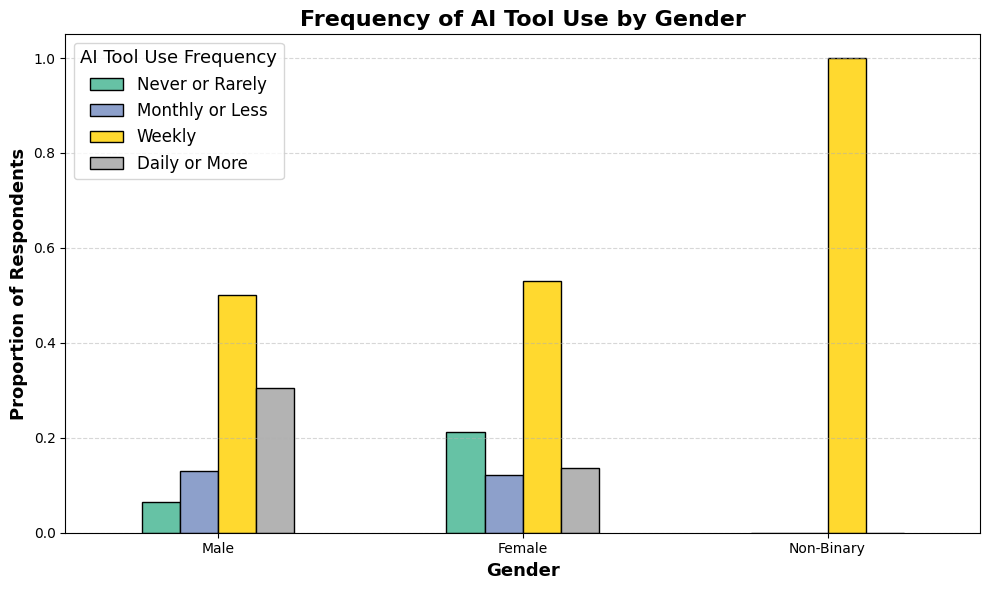

In [173]:
# plot comparitive bar graph
ax = ct_genfreq_norm.plot(kind='bar', figsize=(10, 6), colormap='Set2', edgecolor='black')

plt.title('Frequency of AI Tool Use by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=13, fontweight='bold')
plt.ylabel('Proportion of Respondents', fontsize=13, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title='AI Tool Use Frequency', title_fontsize=13, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Evidenced by the data presented in this bar graph, both men and women use AI tools but to somewhat varying degrees. The line chart demonstrates the mixed trends captured in the comparitive relationship.

*   Men: far more likely to use AI tools in high abundance, answered each other response less prominently compared to women
*   Women: share positive trends with men between the lowest three degress of use with a slightly higher response rate with all of those
*   Non-Binary: not information to make any significant statements unfortunately


Why are men suggesting that use AI tools on a daily basis? Let's find out!

In [174]:
# filter dataframe to only include male responses
male_df = df[df['gender'] == 'Male']

In [175]:
# filter to daily ai tool use
male_daily_df = male_df[male_df['frequency'] == 'Daily or More']

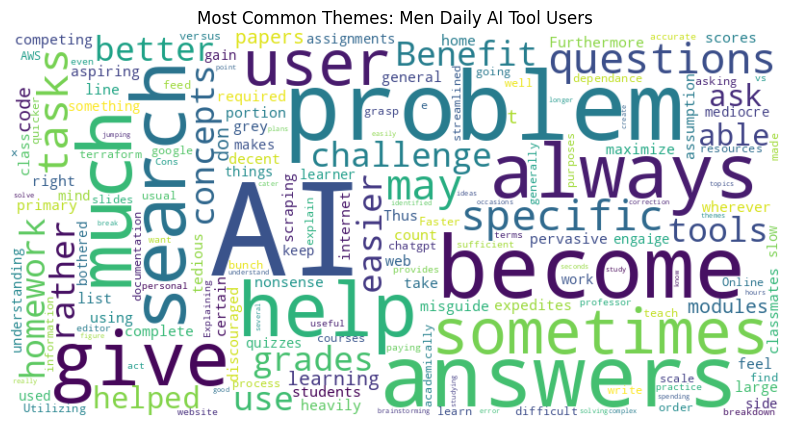

In [176]:
# male daily wordcloud
text_data = male_daily_df['If you have experienced benefits or challenges, please describe them.'].dropna().str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Themes: Men Daily AI Tool Users')
plt.show()

In [177]:
# filter dataframe to only include female responses
female_df = df[df['gender'] == 'Female']

In [178]:
# filter to daily ai tool use
female_daily_df = female_df[female_df['frequency'] == 'Daily or More']

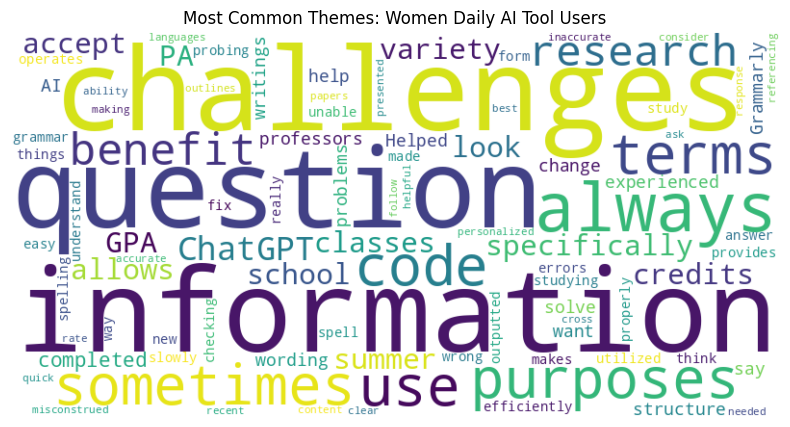

In [179]:
# female daily wordcloud
text_data = female_daily_df['If you have experienced benefits or challenges, please describe them.'].dropna().str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Themes: Women Daily AI Tool Users')
plt.show()

In [180]:
!pip install textblob

import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [181]:
# sentiment scoring function
def get_sentiment(text):
    # missing or non-string entries
    if not isinstance(text, str) or text.strip() == "":
        return None
    return TextBlob(text).sentiment.polarity

In [182]:
# apply sentiment analysis to both groups
male_df['sentiment'] = male_df['If you have experienced benefits or challenges, please describe them.'].apply(get_sentiment)
female_df['sentiment'] = female_df['If you have experienced benefits or challenges, please describe them.'].apply(get_sentiment)

/tmp/ipython-input-656626752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df['sentiment'] = male_df['If you have experienced benefits or challenges, please describe them.'].apply(get_sentiment)
/tmp/ipython-input-656626752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df['sentiment'] = female_df['If you have experienced benefits or challenges, please describe them.'].apply(get_sentiment)


In [ ]:
# bar chart
plt.figure(figsize=(10, 5))
plt.hist(male_df['sentiment'].dropna(), bins=15, alpha=0.7, label='Male', color='blue')
plt.hist(female_df['sentiment'].dropna(), bins=15, alpha=0.7, label='Female', color='pink')
plt.xlabel('Sentiment Polarity', fontweight='bold')
plt.ylabel('Number of Responses', fontweight='bold')
plt.legend()
plt.title('Sentiment Distribution: Benefits/Challenges Responses by Gender', fontweight='bold')
plt.tight_layout()
plt.show()

1. Benefits dominate both men and women, but still have noticable differences in response types.

*   Men that effectively use AI tools everyday have suggested 3x the amount of responses that have suggested benefits, and are less likely to discuss potential drawbacks
*   Women have indicated more mixed responses that likely acknowledge benefits, but are challenged by the potential downsides of utlizing the technology, or vice versa
*   Very little of the open-ended responses held a completely negative connotation and the amount of people that never use the tools is also relatively small



2. Increased use of AI tools and perceived benefits do not have directly correlative trends.

*   For both men and women, the highest amount of beneficial responses come from occasional use of AI tools
*   The benefit / challenge column is more evenly spread among men while women have strong responses within the "Other" mark which leaves some of their responses up to interpretation

Based on these provide outcomes from the visualizations, there are clear differences in how each gender experiences AI in education and their relection of its potential value and drawbacks.

**DIFFERENCE IN MAJOR USE OF AI TOOLS**

What are the most commonly used AI Tools within each major?

In [ ]:
# explode ai tools list
df_exploded = df.explode('ai_tools_list')
# group by major category, tool, count
major_tool_counts = df_exploded.groupby(['major_category', 'ai_tools_list']).size().reset_index(name='count')
# for top 'n' tools by major
top_n = 3
top_major_tools = major_tool_counts.groupby('major_category').apply(lambda x: x.nlargest(top_n, 'count')).reset_index(drop=True)
print(top_major_tools)

In [ ]:
# bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='major_category', y='count', hue='ai_tools_list', data=top_major_tools, palette='Set2')
plt.title('Top 3 AI Tools Used by Major Category', fontsize=16, fontweight='bold')
plt.xlabel('Major Category', fontsize=13, fontweight='bold')
plt.ylabel('Count', fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='AI Tools', title_fontsize=13, fontsize=12)
plt.tight_layout()
plt.show()

ChatGPT is a dominant force in AI tool use. This could easily apply outside of education as well, but its academic influence is substantial.

Are there disproportions in the popularity of AI tools for particular majors?

In [ ]:
# normalize majors through total responses
major_totals = df.groupby('major_category').size().rename('major_total').reset_index()
# reuse exploded dataframe
major_tool_counts = df_exploded.groupby(['major_category', 'ai_tools_list']).size().reset_index(name='count')

# merge and calculate proportion
major_prop_df = major_tool_counts.merge(major_totals, on='major_category')
major_prop_df['proportion'] = major_prop_df['count'] / major_prop_df['major_total']
print(major_prop_df.sort_values(['ai_tools_list', 'proportion'], ascending=[True, False]))

There are a variety of results achieve from determining whether some AI tools are used overabudantly in some majors while being underutilized by others. Some have issues with sample size insensitivity where 4/8 students using a particular tool indicates it has the single largest plurality of any major. Canva seems to uniquely have a large effect in this section because it caters to majors with more specific needs for AI tools.

In [ ]:
# top 1 tool used by each major
top_major_tools = major_tool_counts.groupby('major_category').apply(lambda x: x.nlargest(1, 'count')).reset_index(drop=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='major_category', y='count', hue='ai_tools_list', data=top_major_tools, palette='Set3', edgecolor='black')

for bar in plt.gca().patches:
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()),
                    ha='center', va='bottom')

plt.title('Top AI Tool Used by Major Category', fontsize=16, fontweight='bold')
plt.xlabel('Major Category', fontsize=13, fontweight='bold')
plt.ylabel('Count', fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='AI Tools', title_fontsize=13, fontsize=12)
plt.tight_layout()
print(top_major_tools)

Next, are certain AI tools disproportionately popular for specific majors?

In [ ]:
# series:
tool_counts = df_exploded.groupby(['major_category', 'ai_tools_list']).size()

# convert to df
tool_counts_df = tool_counts.reset_index().rename(columns={0: 'tool_major_count', 'size': 'tool_major_count'})

# major_totals df:
major_totals_df = df.groupby('major_category').size().reset_index(name='major_total')

# safely merge:
tool_props = tool_counts_df.merge(major_totals_df, on='major_category')
tool_props['proportion'] = tool_props['tool_major_count'] / tool_props['major_total']

print(tool_props.head())

In [ ]:
# choose a minimum  count threshold
min_proportion_threshold = 0.1
min_count_threshold = 3

# filter tools with meaningful usage
filtered_tool_props = tool_props[
    (tool_props['proportion'] > min_proportion_threshold) |
    (tool_props['tool_major_count'] >= min_count_threshold)
]
# compare across majors
pivot_filtered = filtered_tool_props.pivot(
    index='ai_tools_list', columns='major_category', values='proportion'
).fillna(0)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(pivot_filtered, annot=True, cmap='viridis', cbar_kws={'label': 'Proportion'})
plt.title('Proportion of Students Using AI Tools by Major (Filtered)')
plt.xlabel('Major')
plt.ylabel('AI Tool')
plt.tight_layout()
plt.show()

In [ ]:
# readable labels
df['major_category'] = df['major_encoded'].map(code_to_category)
df['Frequency'] = df['consistency_encoded'].map(frequency_labels)

# summary table
summary = pd.crosstab(df['Frequency'], df['major_category'])

# sorting frequency categories
ordered_frequencies = ['Rarely / Never', 'Occasionally', 'Regularly', 'Frequently / Daily']
summary = summary.reindex(ordered_frequencies)

# line chart
plt.figure(figsize=(10, 6))
for major in summary.columns:
    plt.plot(summary.index, summary[major], marker='o', label=major)

plt.title('AI Tool Usage Frequency by Major')
plt.xlabel('Frequency of AI Tool Use')
plt.ylabel('Number of Students')
plt.legend(title='Major')
plt.tight_layout()
plt.show()

There are a few basic, yet relevant insights to take from here:

1.   STEM majors more frequently use AI in high abundance, but some of this may be skewed because more STEM students responed in general
2.   Many arts, Education, and Social Science students use AI tools occasionally or regularly, but very few use them frequently / daily
3.   That general difference in trends across all major classifications indicate that AI use frequency is strongly influenced by a students major or study






In [ ]:
# group by gender and frequency
summary_major = pd.crosstab(
    [df['major_category'], df['Frequency']],
    df['ai_updated_ben']
)
print(summary_major)

In [ ]:
# calculate proportions within each group
prop_summary_major = summary_major.div(summary_major.sum(axis=1), axis=0)
# convert to percentages
prop_summary_major_percentage = (prop_summary_major * 100).round(2).astype(str) + '%'
print(prop_summary_major_percentage)

In [ ]:
# stacked bar chart
summary_major.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('AI Tool Benefits and Challenges by Major and Frequency')
plt.ylabel('Number of Responses')
plt.xlabel('Group (Major, Frequency)')
plt.tight_layout()
plt.show()

In [ ]:
# readable labels
df['major_category'] = df['major_encoded'].map(code_to_category)
df['Frequency'] = df['consistency_encoded'].map(frequency_labels)

# Create a summary table: counts by major and frequency
summary = pd.crosstab(df['Frequency'], df['major_category'])
ordered_frequencies = ['Rarely / Never', 'Occasionally', 'Regularly', 'Frequently / Daily']
summary = summary.reindex(ordered_frequencies)

# Number of majors/plots
num_majors = len(summary.columns)
cols = 3  # number of columns in the subplot grid
rows = -(-num_majors // cols)  # ceiling division

# Create small line graphs for each major
fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows), sharey=True)
axes = axes.flatten()

for i, major in enumerate(summary.columns): #### switch to line graph ####
    ax = axes[i]
    ax.plot(summary.index, summary[major], marker='o', color='#4CAF50')
    ax.set_title(f'{major}')
    ax.set_xlabel('Frequency of AI Tool Use')
    ax.set_ylabel('Number of Students')
    ax.set_xticks(range(len(summary.index)))
    ax.set_xticklabels(summary.index, rotation=45, ha='right')
    ax.grid(True, axis='y')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('AI Tool Usage Frequency by Major (Individual Line Graphs)', fontsize=16)
plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()

These visualizations provide even more insights into AI tools in student learning and the difference in experience amongst different majors.

1.   Technical Majors remain the leaders of AI tool use in student learning:

    *   IT (computer science, etc.) and Engineering clearly exhibit the highest use of AI tools in student learning on a frequent to daily basis
    *   STEM fields demonstrate a steeper increase in frequent AI use compared to non-STEM majors that commonly report occasional or, at most, regular AI use

2.   Patterns in frequency of use are inconsistent:

    *   Occasional and regular use are more similar across majors
    *   Most frequent use highly differs by major, almost no one never uses AI tools in education now

3.   Benefits are more abundant amongst STEM majors:

    *   Technical majors demonstrate overwhelming benefits with their use of AI tools (i.e. efficiency, productivity, information availability)
    *   Students in most other majors are likely to mention both advantages and challenges (i.e. confusion of platform use, concern regarding misuse)

4.   AI student adoption is not universal:

    *   While AI tools are being well adopted by some majors, many students out of stem at most, use AI tools with some regularity
    *   To expand benefits and minimize challenges, interventions are necessary to support groups that utilize AI platforms less to address concerns, and across all groups to confirm AI literacy is part of the student experience

**WHAT DOES EACH MAJOR USE AI TOOLS FOR**

Based on the difference in AI tool use among different kinds of majors, it would be important to contextualize how different students use AI tools.

In [ ]:
# ai tool task columns
ai_task_columns = ['Writing', 'Studying', 'Brainstorming', 'Research', 'Programming', 'Nothing']

# create a summary of AI tool usage by major category
summary_by_major = df.groupby('major_category')[ai_task_columns].sum()

print("AI Tool Usage by Major Category:")
print(summary_by_major)

In [ ]:
# calculate proportions within each group
row_totals = summary_by_major.sum(axis=1)
proportions_by_major = summary_by_major.div(summary_by_major.sum(axis=1), axis=0)
# convert to percentages
proportions_by_major_percentage = (proportions_by_major * 100).round(2).astype(str) + '%'
print(proportions_by_major_percentage)

In [ ]:
n_students = df['major_category'].value_counts()

In [ ]:
# add n= annotations to x-tick labels
n_labels = [f"{major}\n(n={n_students.get(major, 0)})" for major in proportions_by_major.index]

ax = proportions_by_major.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='tab10'
)

ax.set_xticks(range(len(n_labels)))
ax.set_xticklabels(n_labels, rotation=45, ha='right')
plt.title('AI Tool Usage by Major Category (Percentage; Sample Size Shown)')
plt.ylabel('Percentage of Students')
plt.xlabel('major_category')
plt.legend(title='AI Tool Task', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns

# add sample sizes to major labels
sample_sizes = df.groupby('major_category').size()
major_with_n = [f"{maj} (n={sample_sizes[maj]})" for maj in proportions_by_major.index]
proportions_by_major_labeled = proportions_by_major.copy()
proportions_by_major_labeled.index = major_with_n

# add text annotations
sns.set(style="whitegrid")
g = sns.clustermap(
    proportions_by_major_labeled,
    cmap='YlOrRd',
    annot=True,
    fmt='.1%',
    col_cluster=False, # set to True to cluster both axes
    linewidth=0.5,
    figsize=(10, 8)
)
plt.suptitle('AI Tool Usage Patterns by Major Category (%)\n(Clustered by Similarity)', y=1.05)
plt.show()

In [ ]:
# find the most popular AI tool for each major
top_tools_by_major = summary_by_major.idxmax(axis=1)

print("Most Popular AI Tool by Major Category:")
for major, tool in top_tools_by_major.items():
    count = summary_by_major.loc[major, tool]
    print(f"{major}: {tool} ({count} students)")

These visualizations specifically related to different majors' use of AI tools reveals various patterns in the data.

1.   Technical majors are most likely to use Programming and Research tools

    *   Not just computer science but engineering majors prominently use AI to help with programming
    *   Arts and education are more likely to use AI tools to assist in brainstorming or writing
    *    Engineers have a nearly homogenous distribution regarding the service of their AI platforms


2. The heat map reveals a variety of interesting comparisons between major categories.
    *    Brainstorming has the smallest interval range between majors and is utilized to a solid degree by majors of all categories
    *    Practically every survey participant that studies in the field of natural sciences uses AI tools for studying purposes

3.   Certain major classifications do not use AI tools for specific purposes whatsoever
    *   Students pursuing education degrees present no use of AI outside of brainstorming or writing
    *   Only one student has demonstrated that they had intentionally never used AI for a single task throughout their entire educational experience

Overall, there are plenty of findings that are unlocked from multivariate comparisons. These help understand the sentiment and utility around AI tools currently being used in school. From here, Machine Learning applications can be used for more signficant determinations.

# Machine Learning / Model Intergration

The first model to be applied will be Latent Dirichlet Allocation (LDA) for Natural Language Processing. This will contribute to finding themes of student sentiment with the open ended responses. The first open ended column of interest will be the benefits / challenges section.

In [ ]:
# install dependencies
!pip install pyLDAvis scikit-learn

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

texts = df['ai_benefit_clean'].dropna().tolist()
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
dtm = vectorizer.fit_transform(texts)

num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda.fit(dtm)

In [ ]:
import pyLDAvis.lda_model

panel = pyLDAvis.lda_model.prepare(lda, dtm, vectorizer)

pyLDAvis.display(panel)
pyLDAvis.enable_notebook()
pyLDAvis.display(panel)

The LDA visualization reveals some important information regarding the general perceived topics in the benefits / concerns

1. The Intertopic Distance Map, *top left*, visually distinguishes the primary themes discussed in student responses

    *   The larger the circle, the more relevant it is through the responses. The further the distance between circles relative to each other, the most distinct they are through an LDA lense


2. Salient terms are common words throughout the responses that identify the individual primary themes.
    *   Words including "helps" or "easier" indicate beneficial use
    *   Words including "complex" or "difficult" may imply challenges without applied context

3. Various words including "structure" and "streamlined" demonstrate specific way that students actively engage with AI tools
    *   As mentioned previously, certain words may reflect issues where students need additional support in specific regards

Next, we will apply the open ended responses about suggestions going forward from students about the university utilizing AI tools.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

texts = df['ai_suggestions_clean'].dropna().tolist()
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
dtm = vectorizer.fit_transform(texts)

num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda.fit(dtm)

In [ ]:
import pyLDAvis.lda_model

panel = pyLDAvis.lda_model.prepare(lda, dtm, vectorizer)

pyLDAvis.display(panel)
pyLDAvis.enable_notebook()
pyLDAvis.display(panel)

Student suggestions demonstrate significant positive impacts and concerns regarding student learning. There primary topics presented demonstrate different components of the student experience with AI tools.

1. Efficiency and convenience appear to be the most salient components of the analysis.
    *   Students commonly highlight how AI tools help them to complete assignments more quickly, provides brainstorming techniques for research and essays, and allowing quick access to a variety of information and knowledge
    *   Brainstorming is key for many students; they find opportunity for this to allow for new approaches to problem solving and decision making
    *   Another common benefit is how the accessibility of these platforms allows for more availability of academic resources

2. Concerns permiate through all categories created by the LDA model
    *  The most addressed concern appears to be that AI tools are providing misleading or inaccurate information to students
    *  Another common issue is the potential for AI to increase current academic problems such as plagerism and fairness with the use of AI generated contents
    *  A somewhat consistent acknowledgement is certain students overusing these platforms to a degree that fundamentally affects critical thinking skills and originality

Main takeaways for students from LDA:

*   Students should use AI for support, but tnot a substitue to apply their own judgement and individual approach
*   Be sure to review AI generated material by fact checking its related resources to make sure the output is accurate
*   Work within instituional guidelines of AI use to avoid  academic wrongdoing and to not sacrifice ones student learning experience






Main takeaways from administrators from LDA:


    *   List item
    *   List item



In [ ]:
import nltk
nltk.download('stopwords')